<a href="https://colab.research.google.com/github/SEANBOWEN-MSBA/Coding-for-Fun/blob/main/ColoradoWildfireAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install descartes

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import calendar

In [6]:
from datetime import datetime, timedelta

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
CoFires = pd.read_csv('/content/drive/MyDrive/CoFire/CO_Fires.csv', index_col = None, dtype={'COMPLEX_NAME': str})

In [9]:
CoFires.head()

OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0        48      48  FS-1418940                FED   FS-FIRESTAT   
1        62      62  FS-1418976                FED   FS-FIRESTAT   
2        63      63  FS-1418978                FED   FS-FIRESTAT   
3       115     117  FS-1419150                FED   FS-FIRESTAT   
4       206     209  FS-1419344                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0                    FS                USCOPSF   
1                    FS                USCOPSF   
2                    FS                USCOPSF   
3                    FS                USCOPSF   
4                    FS                USCOPSF   

              NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
0  Pike and San Isabel National Forest                  0212   
1  Pike and San Isabel National Forest                  0212   
2  Pike and San Isabel National Forest                  0212   
3  Pike and San Isabel National Forest                  0212   
4  Pike and San Isabel National Forest                  0212   

        SOURCE_REPORTING_UNIT_NAME  ...  FIRE_SIZE_CLASS   LATITUDE  \
0  Pike San Isabel National Forest  ...                B  39.292222   
1  Pike San Isabel National Forest  ...                A  38.913333   
2  Pike San Isabel National Forest  ...                A  39.100278   
3  Pike San Isabel National Forest  ...                C  37.345000   
4  Pike San Isabel National Forest  ...                B  38.891111   

    LONGITUDE OWNER_CODE       OWNER_DESCR STATE COUNTY FIPS_CODE FIPS_NAME  \
0 -105.183056          5              USFS    CO    NaN       NaN       NaN   
1 -105.983611          5              USFS    CO    NaN       NaN       NaN   
2 -106.367500          5              USFS    CO    NaN       NaN       NaN   
3 -102.805833          5              USFS    CO    NaN       NaN       NaN   
4 -105.431944         13  STATE OR PRIVATE    CO    NaN       NaN       NaN   

                                               Shape  
0  0001ad10000040e3aa2eb74b5ac04808a78967a5434040...  
1  0001ad100000a85b037cf37e5ac03859471be8744340a8...  
2  0001ad100000e851b81e85975ac0d0cefce6d58c4340e8...  
3  0001ad1000001c98f5c592b359c0608fc2f528ac42401c...  
4  0001ad10000048df4afaa45b5ac0b846c9ed0f72434048...  

[5 rows x 39 columns]

In [10]:
CoFires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34157 entries, 0 to 34156
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OBJECTID                    34157 non-null  int64  
 1   FOD_ID                      34157 non-null  int64  
 2   FPA_ID                      34157 non-null  object 
 3   SOURCE_SYSTEM_TYPE          34157 non-null  object 
 4   SOURCE_SYSTEM               34157 non-null  object 
 5   NWCG_REPORTING_AGENCY       34157 non-null  object 
 6   NWCG_REPORTING_UNIT_ID      34157 non-null  object 
 7   NWCG_REPORTING_UNIT_NAME    34157 non-null  object 
 8   SOURCE_REPORTING_UNIT       34157 non-null  object 
 9   SOURCE_REPORTING_UNIT_NAME  34157 non-null  object 
 10  LOCAL_FIRE_REPORT_ID        12602 non-null  float64
 11  LOCAL_INCIDENT_ID           12662 non-null  object 
 12  FIRE_CODE                   19094 non-null  object 
 13  FIRE_NAME                   270

FOD_ID = Global unique identifier.
FPA_ID = Unique identifier that contains information necessary to track back to the original record in the source dataset.
SOURCE_SYSTEM_TYPE = Type of source database or system that the record was drawn from (federal, nonfederal, or interagency).
SOURCE_SYSTEM = Name of or other identifier for source database or system that the record was drawn from. See Table 1 in Short (2014), or \Supplements\FPA_FOD_source_list.pdf, for a list of sources and their identifier.
NWCG_REPORTING_AGENCY = Active National Wildlife Coordinating Group (NWCG) Unit Identifier for the agency preparing the fire report (BIA = Bureau of Indian Affairs, BLM = Bureau of Land Management, BOR = Bureau of Reclamation, DOD = Department of Defense, DOE = Department of Energy, FS = Forest Service, FWS = Fish and Wildlife Service, IA = Interagency Organization, NPS = National Park Service, ST/C&L = State, County, or Local Organization, and TRIBE = Tribal Organization).
NWCG_REPORTING_UNIT_ID = Active NWCG Unit Identifier for the unit preparing the fire report.
NWCG_REPORTING_UNIT_NAME = Active NWCG Unit Name for the unit preparing the fire report.
SOURCE_REPORTING_UNIT = Code for the agency unit preparing the fire report, based on code/name in the source dataset.
SOURCE_REPORTING_UNIT_NAME = Name of reporting agency unit preparing the fire report, based on code/name in the source dataset.
LOCAL_FIRE_REPORT_ID = Number or code that uniquely identifies an incident report for a particular reporting unit and a particular calendar year.
LOCAL_INCIDENT_ID = Number or code that uniquely identifies an incident for a particular local fire management organization within a particular calendar year.
FIRE_CODE = Code used within the interagency wildland fire community to track and compile cost information for emergency fire suppression (https://www.firecode.gov/).
FIRE_NAME = Name of the incident, from the fire report (primary) or ICS-209 report (secondary).
ICS_209_INCIDENT_NUMBER = Incident (event) identifier, from the ICS-209 report.
ICS_209_NAME = Name of the incident, from the ICS-209 report.
MTBS_ID = Incident identifier, from the MTBS perimeter dataset.
MTBS_FIRE_NAME = Name of the incident, from the MTBS perimeter dataset.
COMPLEX_NAME = Name of the complex under which the fire was ultimately managed, when discernible.
FIRE_YEAR = Calendar year in which the fire was discovered or confirmed to exist.
DISCOVERY_DATE = Date on which the fire was discovered or confirmed to exist.
DISCOVERY_DOY = Day of year on which the fire was discovered or confirmed to exist.
DISCOVERY_TIME = Time of day that the fire was discovered or confirmed to exist.
STAT_CAUSE_CODE = Code for the (statistical) cause of the fire.
STAT_CAUSE_DESCR = Description of the (statistical) cause of the fire.
CONT_DATE = Date on which the fire was declared contained or otherwise controlled (mm/dd/yyyy where mm=month, dd=day, and yyyy=year).
CONT_DOY = Day of year on which the fire was declared contained or otherwise controlled.
CONT_TIME = Time of day that the fire was declared contained or otherwise controlled (hhmm where hh=hour, mm=minutes).
FIRE_SIZE = Estimate of acres within the final perimeter of the fire.
FIRE_SIZE_CLASS = Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).
LATITUDE = Latitude (NAD83) for point location of the fire (decimal degrees).
LONGITUDE = Longitude (NAD83) for point location of the fire (decimal degrees).
OWNER_CODE = Code for primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.
OWNER_DESCR = Name of primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.
STATE = Two-letter alphabetic code for the state in which the fire burned (or originated), based on the nominal designation in the fire report.
COUNTY = County, or equivalent, in which the fire burned (or originated), based on nominal designation in the fire report.
FIPS_CODE = Three-digit code from the Federal Information Process Standards (FIPS) publication 6-4 for representation of counties and equivalent entities.
FIPS_NAME = County name from the FIPS publication 6-4 for representation of counties and equivalent entities.

In [11]:
epoch = pd.to_datetime(0, unit='s').to_julian_date()

In [12]:
CoFires['DISCOVERY_DATE']= pd.to_datetime(CoFires['DISCOVERY_DATE'] - epoch, unit='D')

In [13]:
CoFires.groupby('DISCOVERY_DATE').FOD_ID.count()

DISCOVERY_DATE
1992-01-02    1
1992-01-03    1
1992-01-06    1
1992-01-12    1
1992-01-15    1
             ..
2015-10-28    1
2015-11-02    1
2015-11-03    1
2015-11-04    1
2015-11-07    2
Name: FOD_ID, Length: 5325, dtype: int64

In [14]:
CoFires['CONT_DATE']= pd.to_datetime(CoFires['CONT_DATE'] - epoch, unit='D')

In [15]:
firesByYear = CoFires.groupby(CoFires['DISCOVERY_DATE'].map(lambda x: x.year)).FOD_ID.count()

Text(0.5, 0, 'Year')

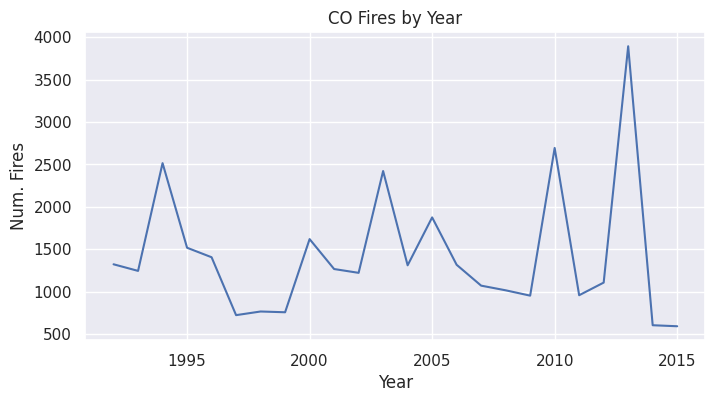

In [16]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.lineplot(firesByYear)
ax.set_title('CO Fires by Year')
ax.set_ylabel('Num. Fires')
ax.set_xlabel('Year')

In [17]:
firesByMonth = CoFires.groupby(CoFires['DISCOVERY_DATE'].map(lambda x: x.month)).FOD_ID.count()

Text(0.5, 0, 'Month')

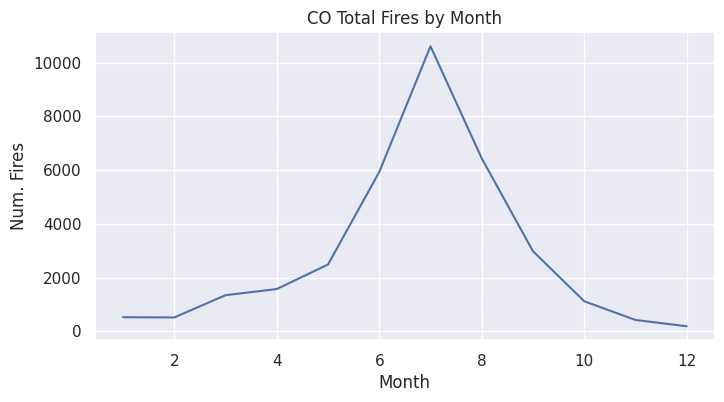

In [18]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.lineplot(firesByMonth)
ax.set_title('CO Total Fires by Month')
ax.set_ylabel('Num. Fires')
ax.set_xlabel('Month')

In [19]:
AvgPerMonth = CoFires.groupby(CoFires['DISCOVERY_DATE'].map(lambda x: x.month)).FOD_ID.count() / 12

In [20]:
apm = pd.DataFrame(AvgPerMonth).reset_index()

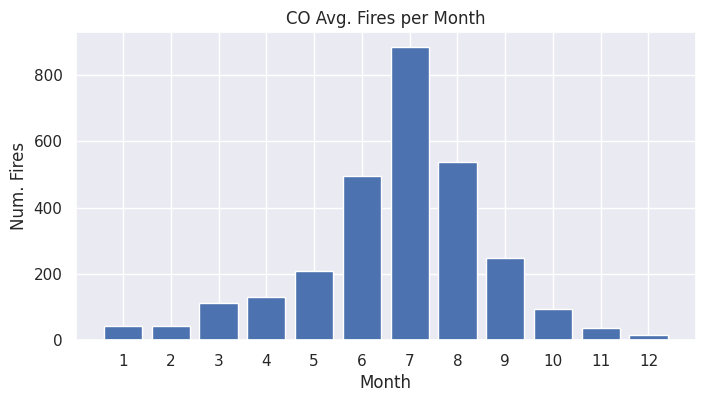

In [21]:
plt.bar(apm['DISCOVERY_DATE'], apm['FOD_ID'])
plt.xticks(apm['DISCOVERY_DATE'])
plt.title('CO Avg. Fires per Month')
plt.xlabel('Month')
plt.ylabel('Num. Fires')
plt.show()

In [22]:
pd.set_option('display.max_rows', 500)

In [23]:
FiresByCount = pd.DataFrame(CoFires.groupby('FIPS_NAME').FOD_ID.count().reset_index().sort_values(by = 'FOD_ID', ascending = True))

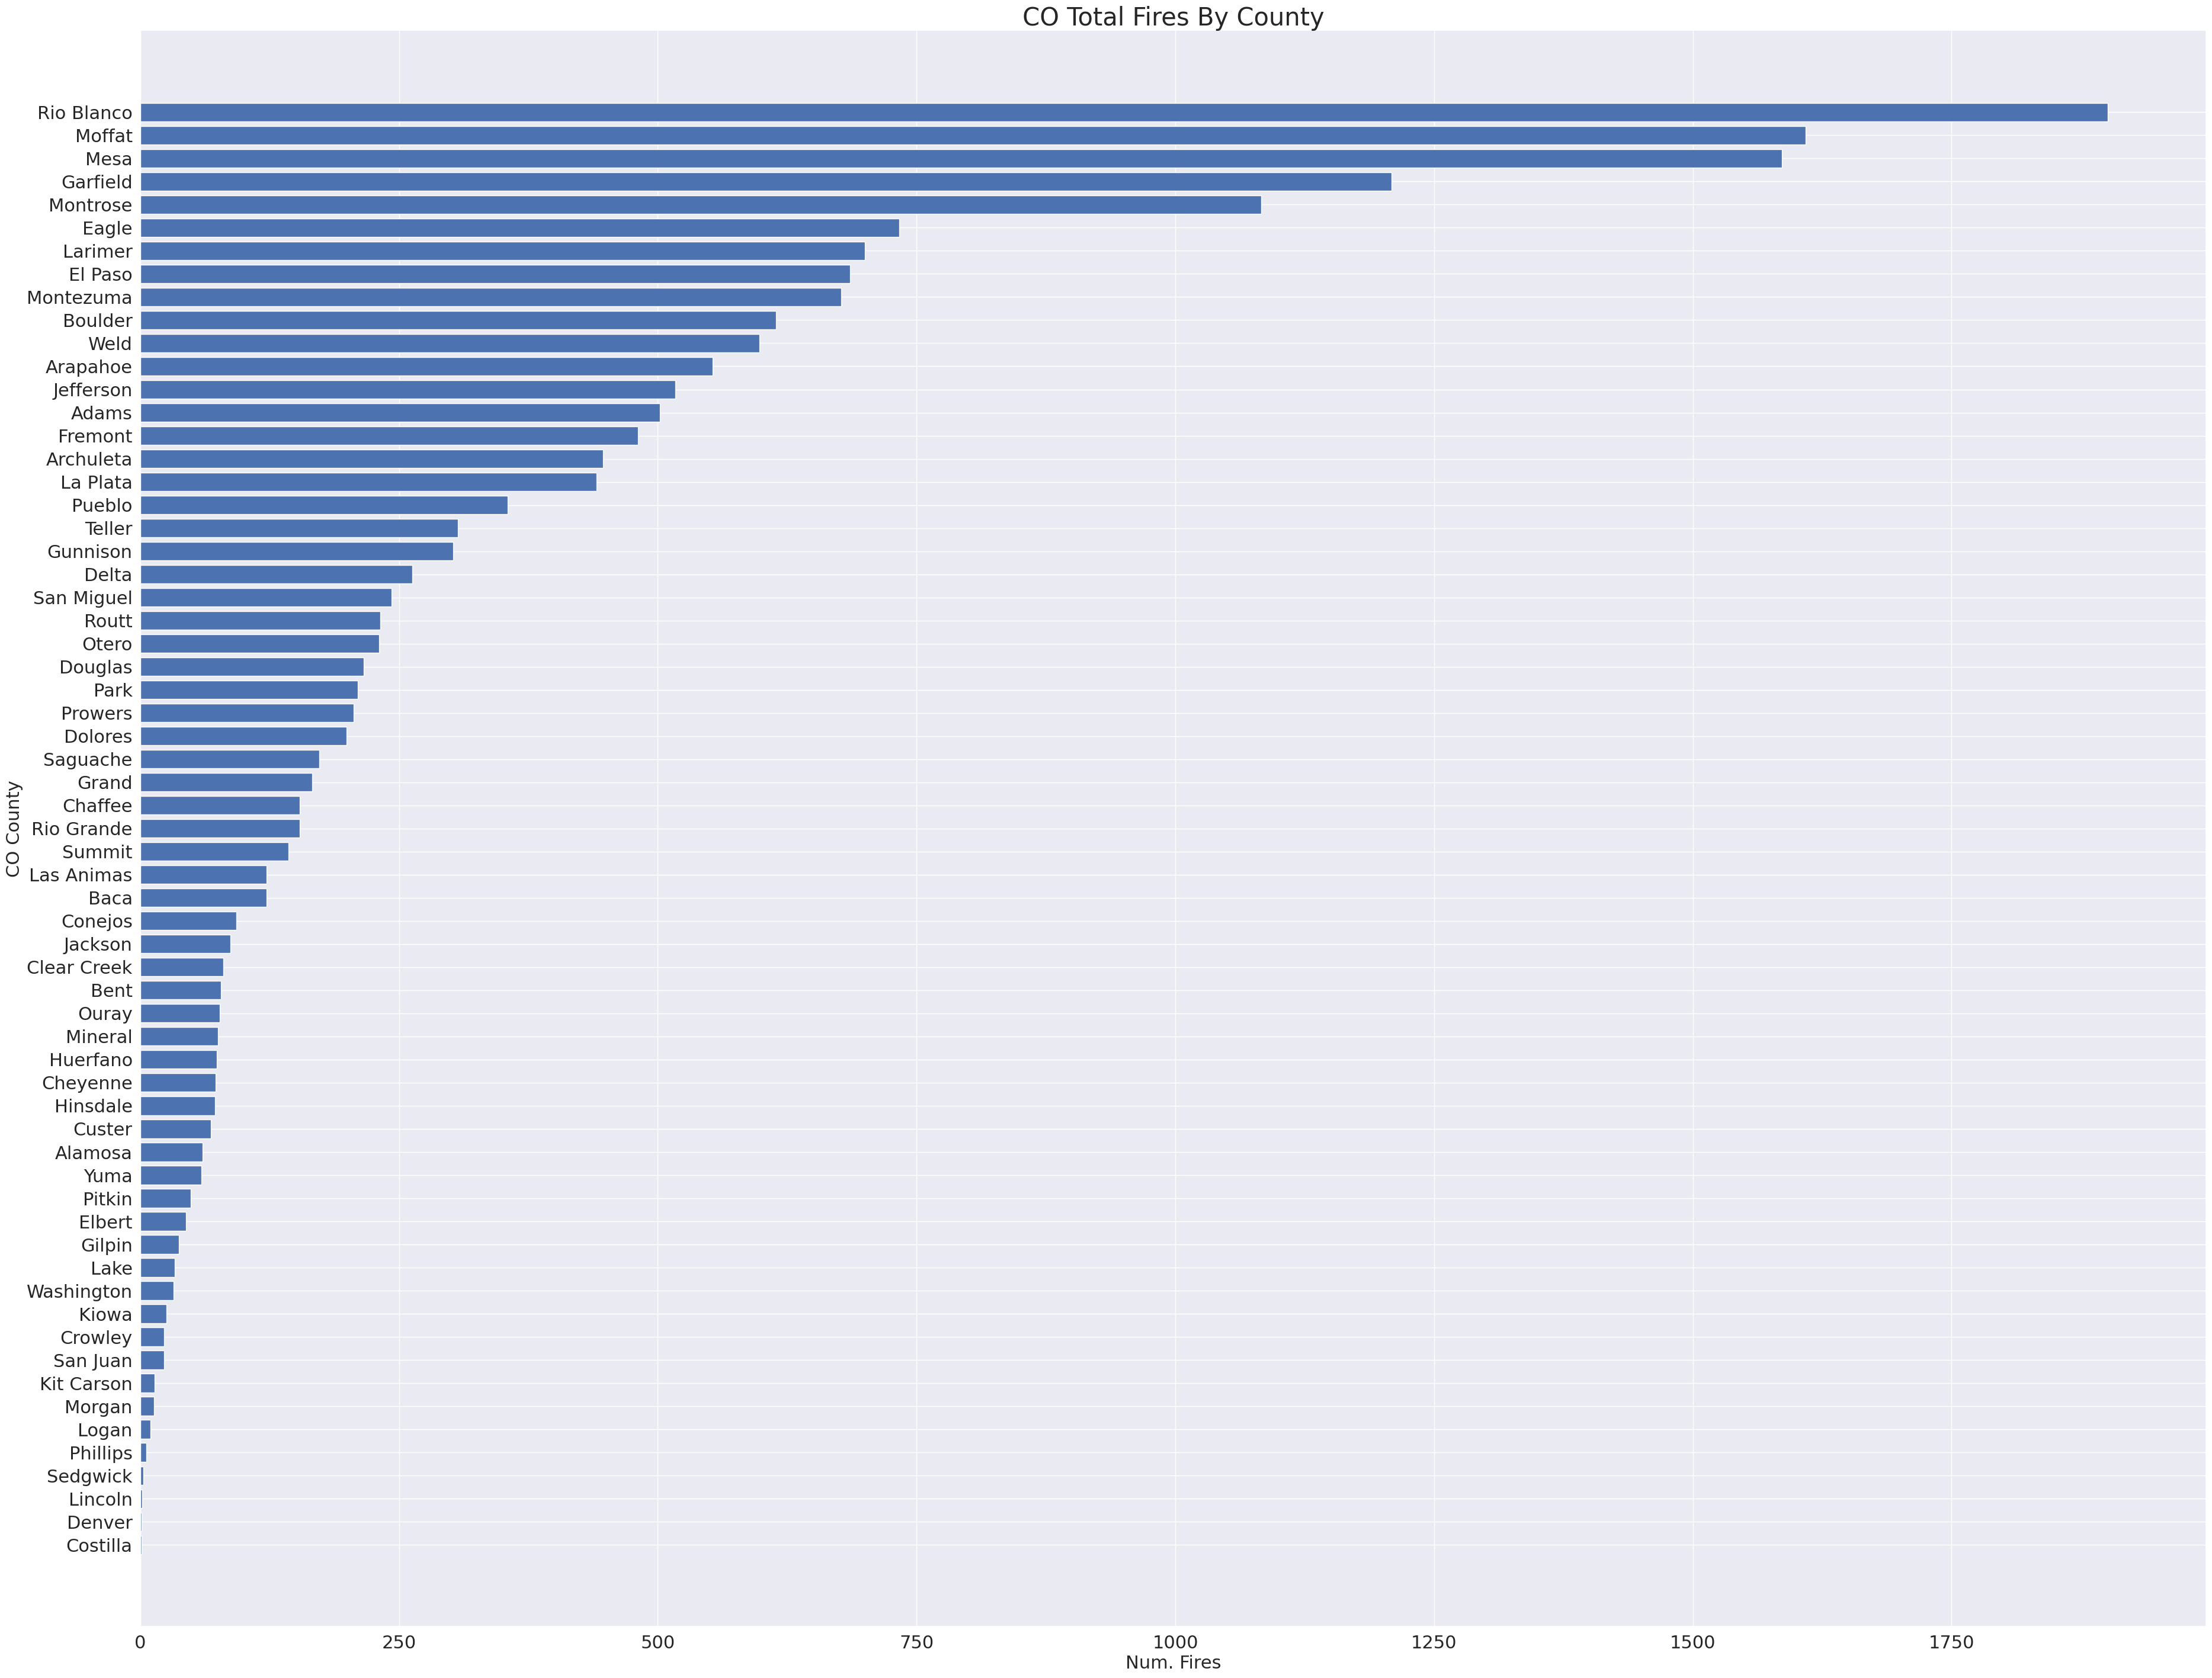

In [24]:
plt.figure(figsize=(45,35))
plt.barh(FiresByCount['FIPS_NAME'], FiresByCount['FOD_ID'])
plt.title("CO Total Fires By County", fontsize = 30)
plt.xlabel("Num. Fires", fontsize = 22)
plt.ylabel("CO County", fontsize = 22)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.show()

In [25]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [26]:
street_map = gpd.read_file("/content/drive/MyDrive/CoFire/Colorado_County_Boundaries.shp")

<Axes: >

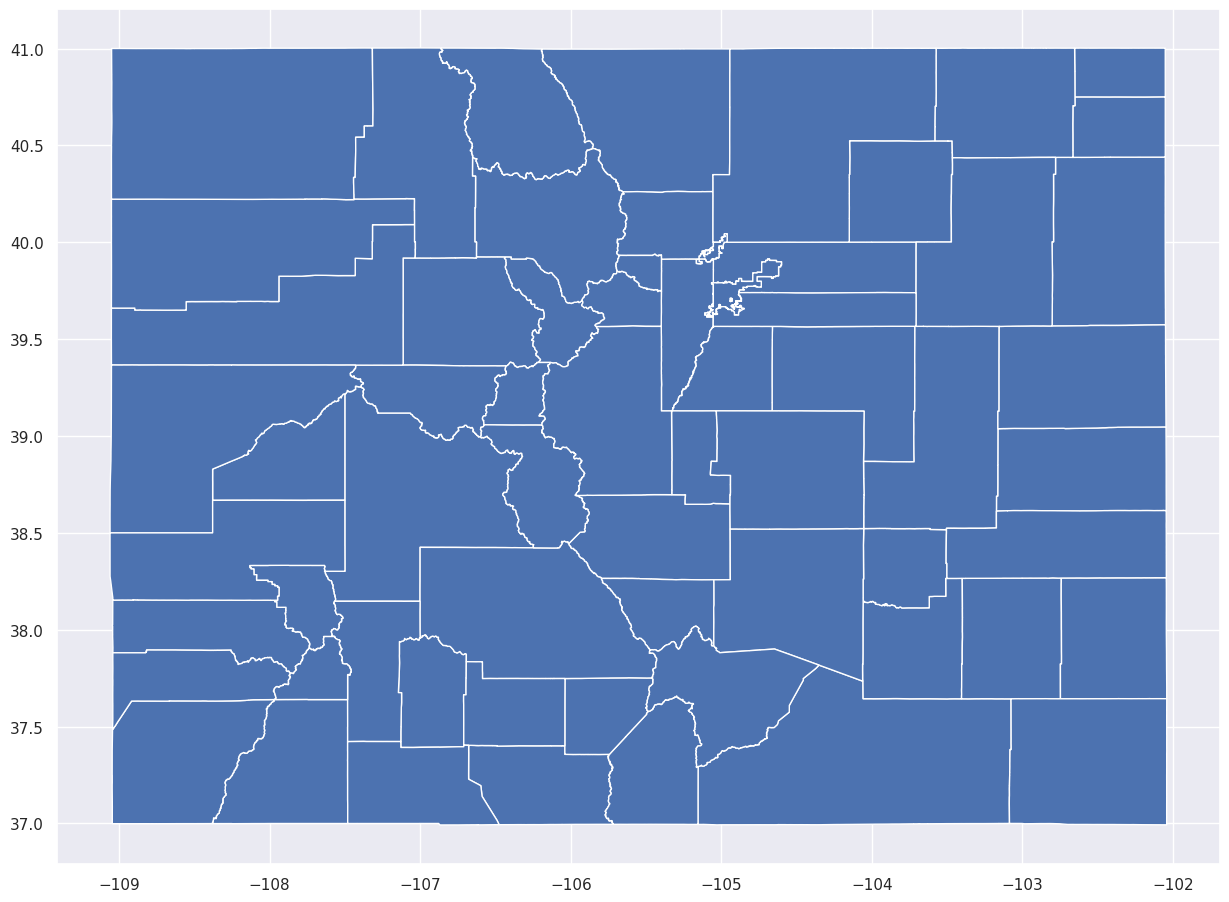

In [27]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [28]:
crs = 'epsg:4326'

In [29]:
geometry = [Point(xy) for xy in zip(CoFires['LONGITUDE'], CoFires['LATITUDE'])]
geometry[:3]

[<POINT (-105.183 39.292)>, <POINT (-105.984 38.913)>, <POINT (-106.368 39.1)>]

In [30]:
geo_df = gpd.GeoDataFrame(CoFires, crs = crs, geometry = geometry)

In [31]:
geo_df

OBJECTID     FOD_ID               FPA_ID SOURCE_SYSTEM_TYPE  \
0            48         48           FS-1418940                FED   
1            62         62           FS-1418976                FED   
2            63         63           FS-1418978                FED   
3           115        117           FS-1419150                FED   
4           206        209           FS-1419344                FED   
...         ...        ...                  ...                ...   
34152   1860040  300293890  ICS209_2015_2951122          INTERAGCY   
34153   1860044  300293896  ICS209_2015_2943624          INTERAGCY   
34154   1860045  300293897  ICS209_2015_2945433          INTERAGCY   
34155   1860049  300293901  ICS209_2015_2949787          INTERAGCY   
34156   1860055  300293908  ICS209_2015_2944622          INTERAGCY   

      SOURCE_SYSTEM NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0       FS-FIRESTAT                    FS                USCOPSF   
1       FS-FIRESTAT                    FS                USCOPSF   
2       FS-FIRESTAT                    FS                USCOPSF   
3       FS-FIRESTAT                    FS                USCOPSF   
4       FS-FIRESTAT                    FS                USCOPSF   
...             ...                   ...                    ...   
34152     IA-ICS209                   DOD                USCOFCQ   
34153     IA-ICS209                ST/C&L                USCOELX   
34154     IA-ICS209                ST/C&L                USCOHUX   
34155     IA-ICS209                ST/C&L                USCOWEX   
34156     IA-ICS209                ST/C&L                USCOLRX   

                  NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
0      Pike and San Isabel National Forest                  0212   
1      Pike and San Isabel National Forest                  0212   
2      Pike and San Isabel National Forest                  0212   
3      Pike and San Isabel National Forest                  0212   
4      Pike and San Isabel National Forest                  0212   
...                                    ...                   ...   
34152                Fort Carson Army Base                 COFCQ   
34153                        Elbert County                 COELX   
34154                      Huerfano County                 COHUX   
34155                          Weld County                 COWEX   
34156                       Larimer County                 COLRX   

            SOURCE_REPORTING_UNIT_NAME  ...   LATITUDE   LONGITUDE OWNER_CODE  \
0      Pike San Isabel National Forest  ...  39.292222 -105.183056          5   
1      Pike San Isabel National Forest  ...  38.913333 -105.983611          5   
2      Pike San Isabel National Forest  ...  39.100278 -106.367500          5   
3      Pike San Isabel National Forest  ...  37.345000 -102.805833          5   
4      Pike San Isabel National Forest  ...  38.891111 -105.431944         13   
...                                ...  ...        ...         ...        ...   
34152            Fort Carson Army Base  ...  38.609900 -104.807800          6   
34153                    Elbert County  ...  39.421667 -103.878333         13   
34154                  Huerfano County  ...  37.545900 -105.007100         13   
34155                      Weld County  ...  40.394700 -104.564600         13   
34156                   Larimer County  ...  40.819800 -105.084700         13   

            OWNER_DESCR STATE           COUNTY FIPS_CODE FIPS_NAME  \
0                  USFS    CO              NaN       NaN       NaN   
1                  USFS    CO              NaN       NaN       NaN   
2                  USFS    CO              NaN       NaN       NaN   
3                  USFS    CO              NaN       NaN       NaN   
4      STATE OR PRIVATE    CO              NaN       NaN       NaN   
...                 ...   ...              ...       ...       ...   
34152     OTHER FEDERAL    CO   El Paso County      41.0   El Paso   

In [32]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34157 entries, 0 to 34156
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   OBJECTID                    34157 non-null  int64         
 1   FOD_ID                      34157 non-null  int64         
 2   FPA_ID                      34157 non-null  object        
 3   SOURCE_SYSTEM_TYPE          34157 non-null  object        
 4   SOURCE_SYSTEM               34157 non-null  object        
 5   NWCG_REPORTING_AGENCY       34157 non-null  object        
 6   NWCG_REPORTING_UNIT_ID      34157 non-null  object        
 7   NWCG_REPORTING_UNIT_NAME    34157 non-null  object        
 8   SOURCE_REPORTING_UNIT       34157 non-null  object        
 9   SOURCE_REPORTING_UNIT_NAME  34157 non-null  object        
 10  LOCAL_FIRE_REPORT_ID        12602 non-null  float64       
 11  LOCAL_INCIDENT_ID           12662 non-null  ob

<Axes: >

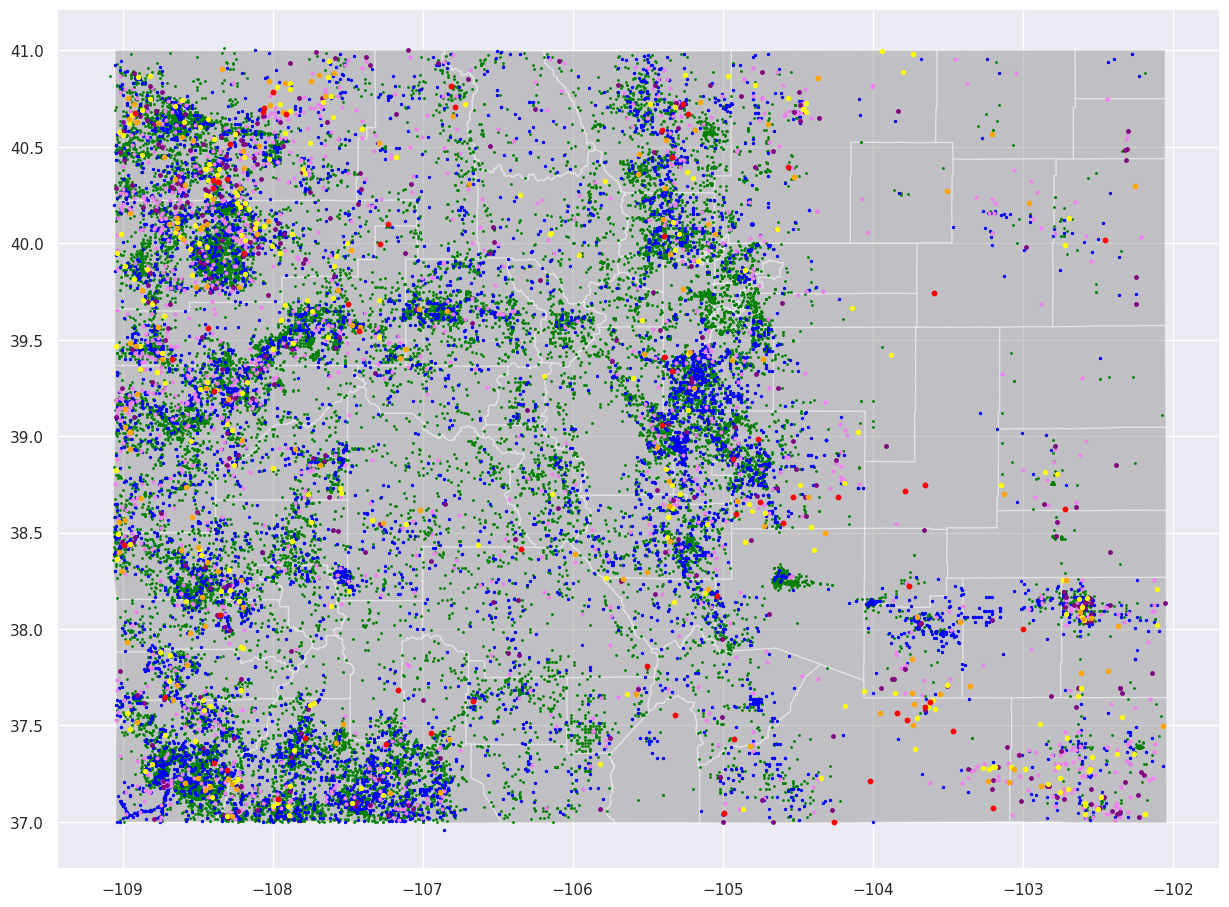

In [33]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['FIRE_SIZE_CLASS']=='A'].plot(ax = ax, markersize = 1, color = 'green', marker = "o")
geo_df[geo_df['FIRE_SIZE_CLASS']=='B'].plot(ax = ax, markersize = 2, color = 'blue', marker = "o")
geo_df[geo_df['FIRE_SIZE_CLASS']=='C'].plot(ax = ax, markersize = 4, color = 'violet', marker = "o")
geo_df[geo_df['FIRE_SIZE_CLASS']=='D'].plot(ax = ax, markersize = 6, color = 'purple', marker = "o")
geo_df[geo_df['FIRE_SIZE_CLASS']=='E'].plot(ax = ax, markersize = 8, color = 'yellow', marker = "o")
geo_df[geo_df['FIRE_SIZE_CLASS']=='F'].plot(ax = ax, markersize = 9, color = 'orange', marker = "o")
geo_df[geo_df['FIRE_SIZE_CLASS']=='G'].plot(ax = ax, markersize = 10, color = 'red', marker = "o")

In [34]:
AFires = pd.DataFrame(CoFires.where(CoFires['FIRE_SIZE_CLASS'] == 'A').groupby('FIPS_NAME').FOD_ID.count().reset_index().sort_values(by = 'FOD_ID',ascending = True))
BFires = pd.DataFrame(CoFires.where(CoFires['FIRE_SIZE_CLASS'] == 'B').groupby('FIPS_NAME').FOD_ID.count().reset_index().sort_values(by = 'FOD_ID',ascending = True))
CFires = pd.DataFrame(CoFires.where(CoFires['FIRE_SIZE_CLASS'] == 'C').groupby('FIPS_NAME').FOD_ID.count().reset_index().sort_values(by = 'FOD_ID',ascending = True))
DFires = pd.DataFrame(CoFires.where(CoFires['FIRE_SIZE_CLASS'] == 'D').groupby('FIPS_NAME').FOD_ID.count().reset_index().sort_values(by = 'FOD_ID',ascending = True))
EFires = pd.DataFrame(CoFires.where(CoFires['FIRE_SIZE_CLASS'] == 'E').groupby('FIPS_NAME').FOD_ID.count().reset_index().sort_values(by = 'FOD_ID',ascending = True))
FFires = pd.DataFrame(CoFires.where(CoFires['FIRE_SIZE_CLASS'] == 'F').groupby('FIPS_NAME').FOD_ID.count().reset_index().sort_values(by = 'FOD_ID',ascending = True))
GFires = pd.DataFrame(CoFires.where(CoFires['FIRE_SIZE_CLASS'] == 'G').groupby('FIPS_NAME').FOD_ID.count().reset_index().sort_values(by = 'FOD_ID',ascending = True))

In [35]:
label = ['G','F','E','D','C','B','A']

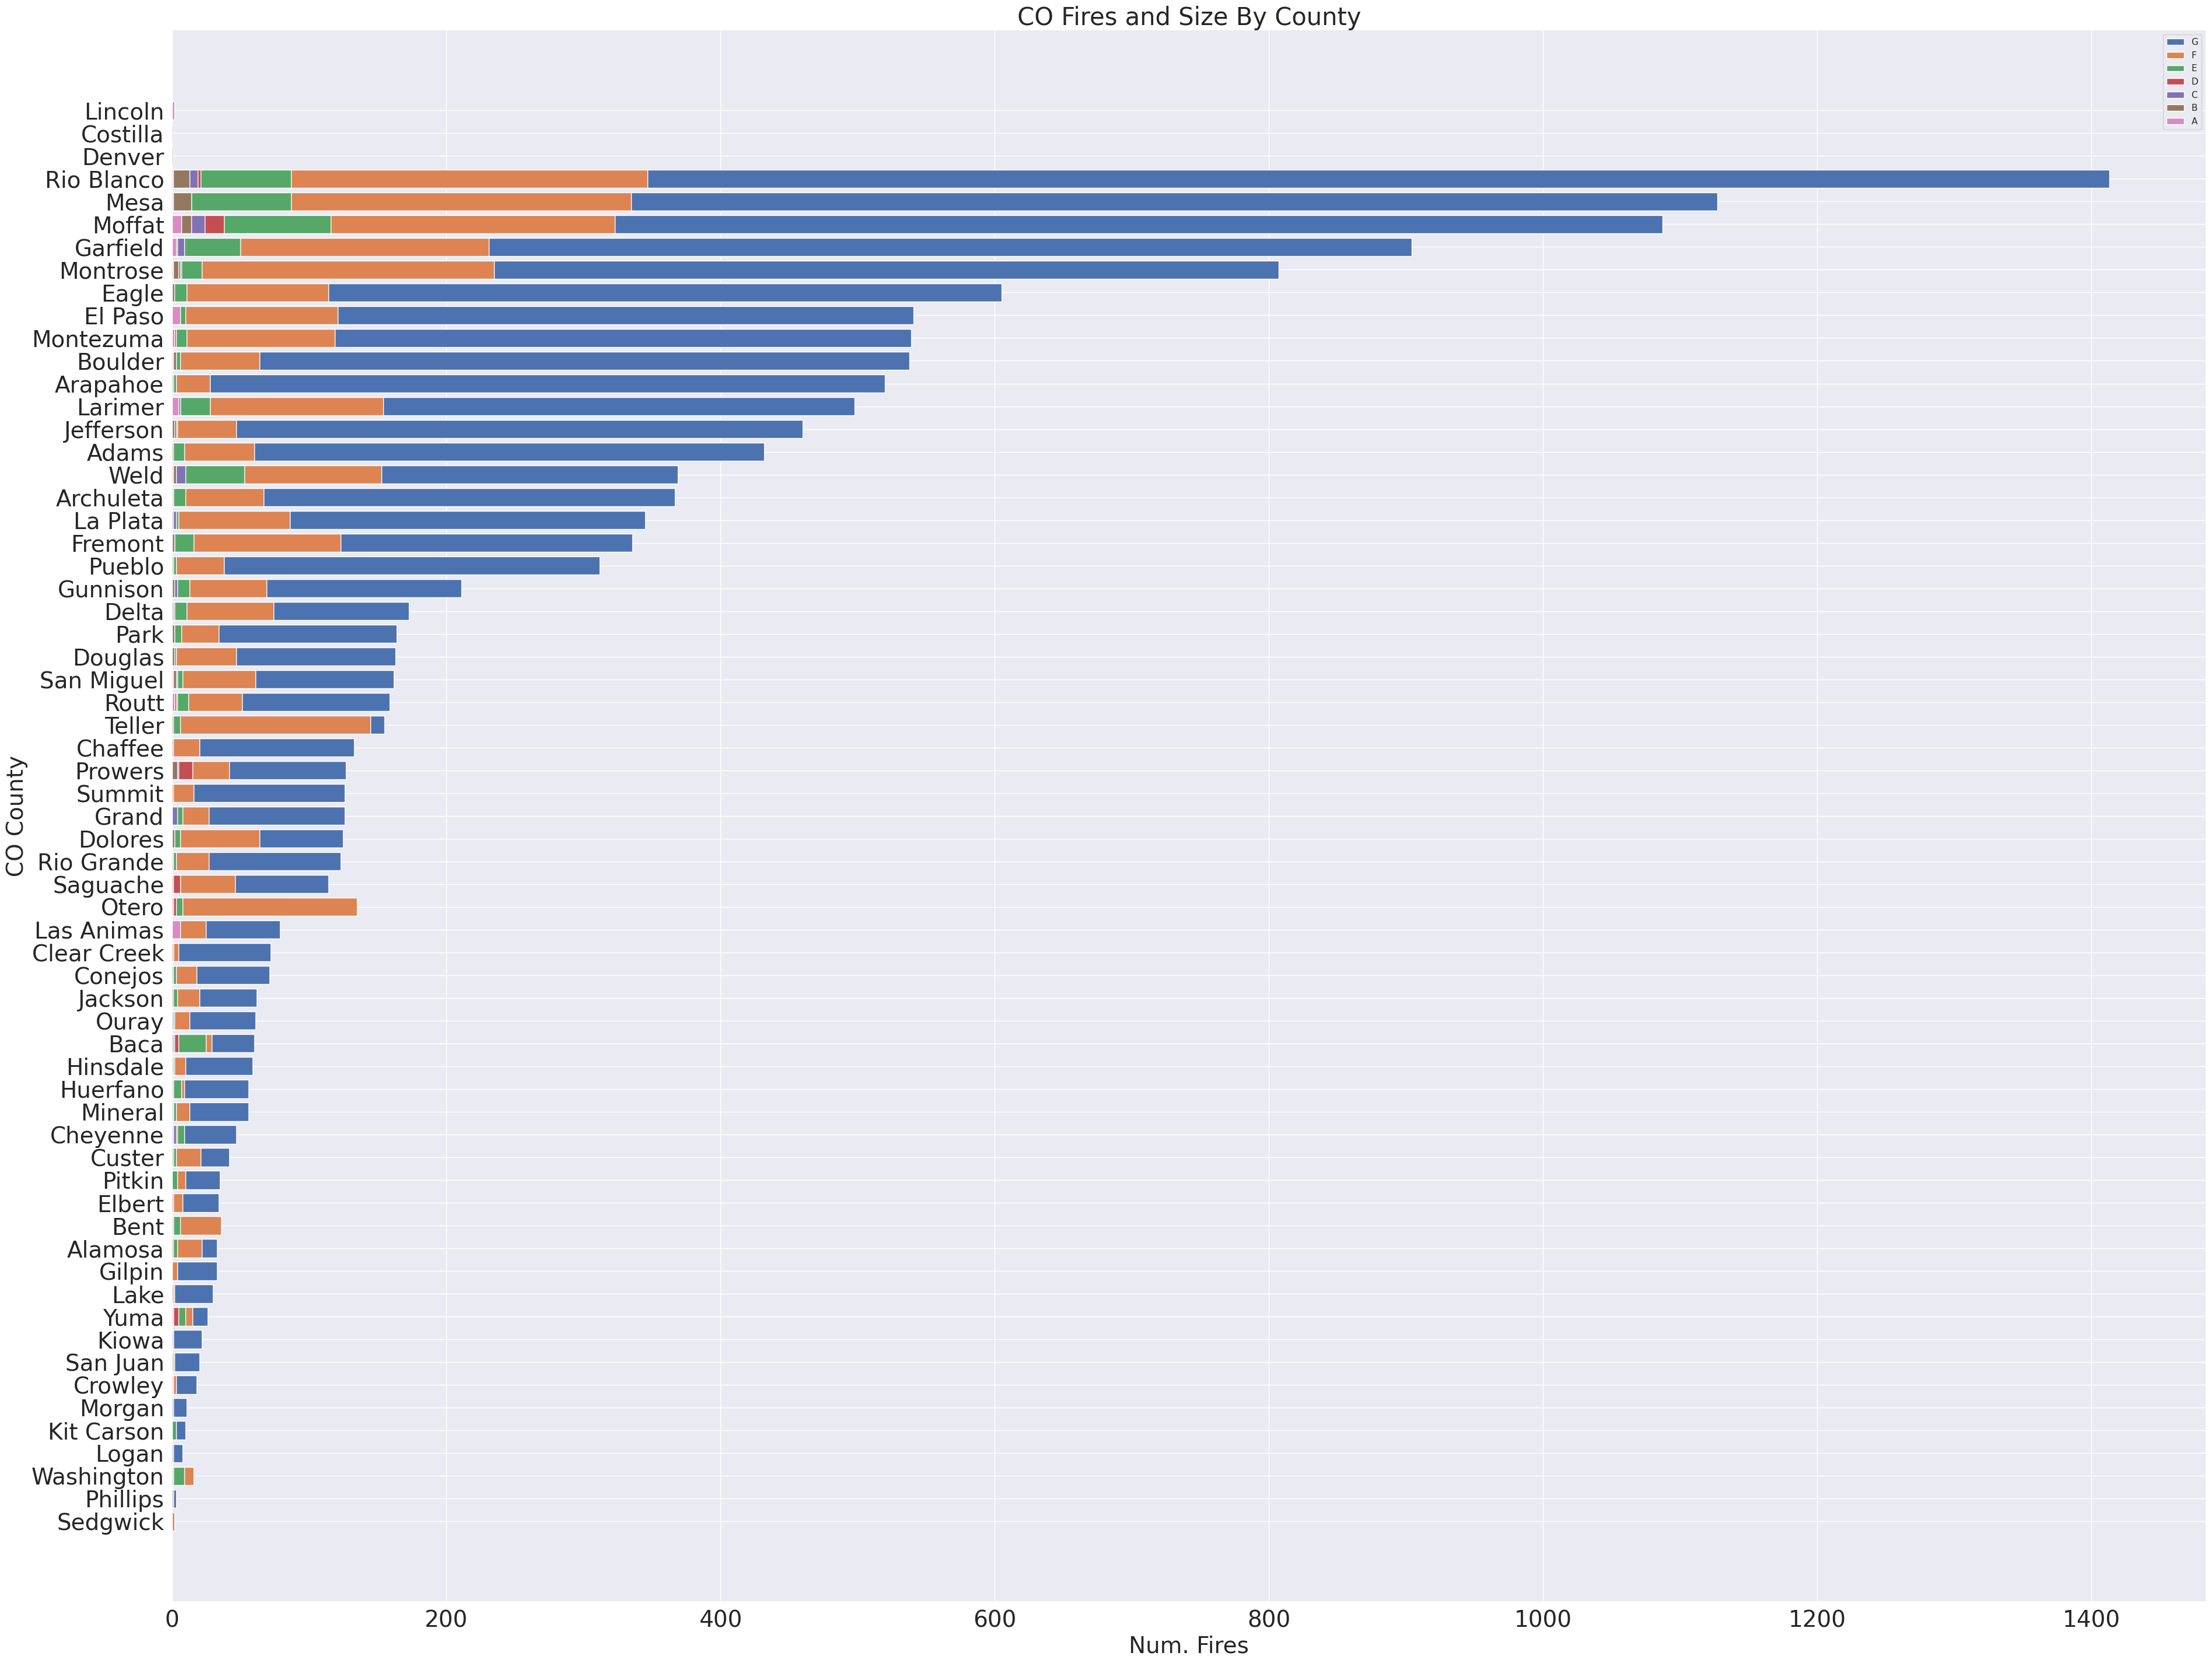

In [36]:
plt.figure(figsize=(45,35))
plt.barh(AFires['FIPS_NAME'], AFires['FOD_ID'])
plt.barh(BFires['FIPS_NAME'], BFires['FOD_ID'])
plt.barh(CFires['FIPS_NAME'], CFires['FOD_ID'])
plt.barh(DFires['FIPS_NAME'], DFires['FOD_ID'])
plt.barh(EFires['FIPS_NAME'], EFires['FOD_ID'])
plt.barh(FFires['FIPS_NAME'], FFires['FOD_ID'])
plt.barh(GFires['FIPS_NAME'], GFires['FOD_ID'])
plt.title("CO Fires and Size By County", fontsize = 30)
plt.xlabel("Num. Fires", fontsize = 28)
plt.ylabel("CO County", fontsize = 28)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.legend(label, loc = 'best')
plt.show()

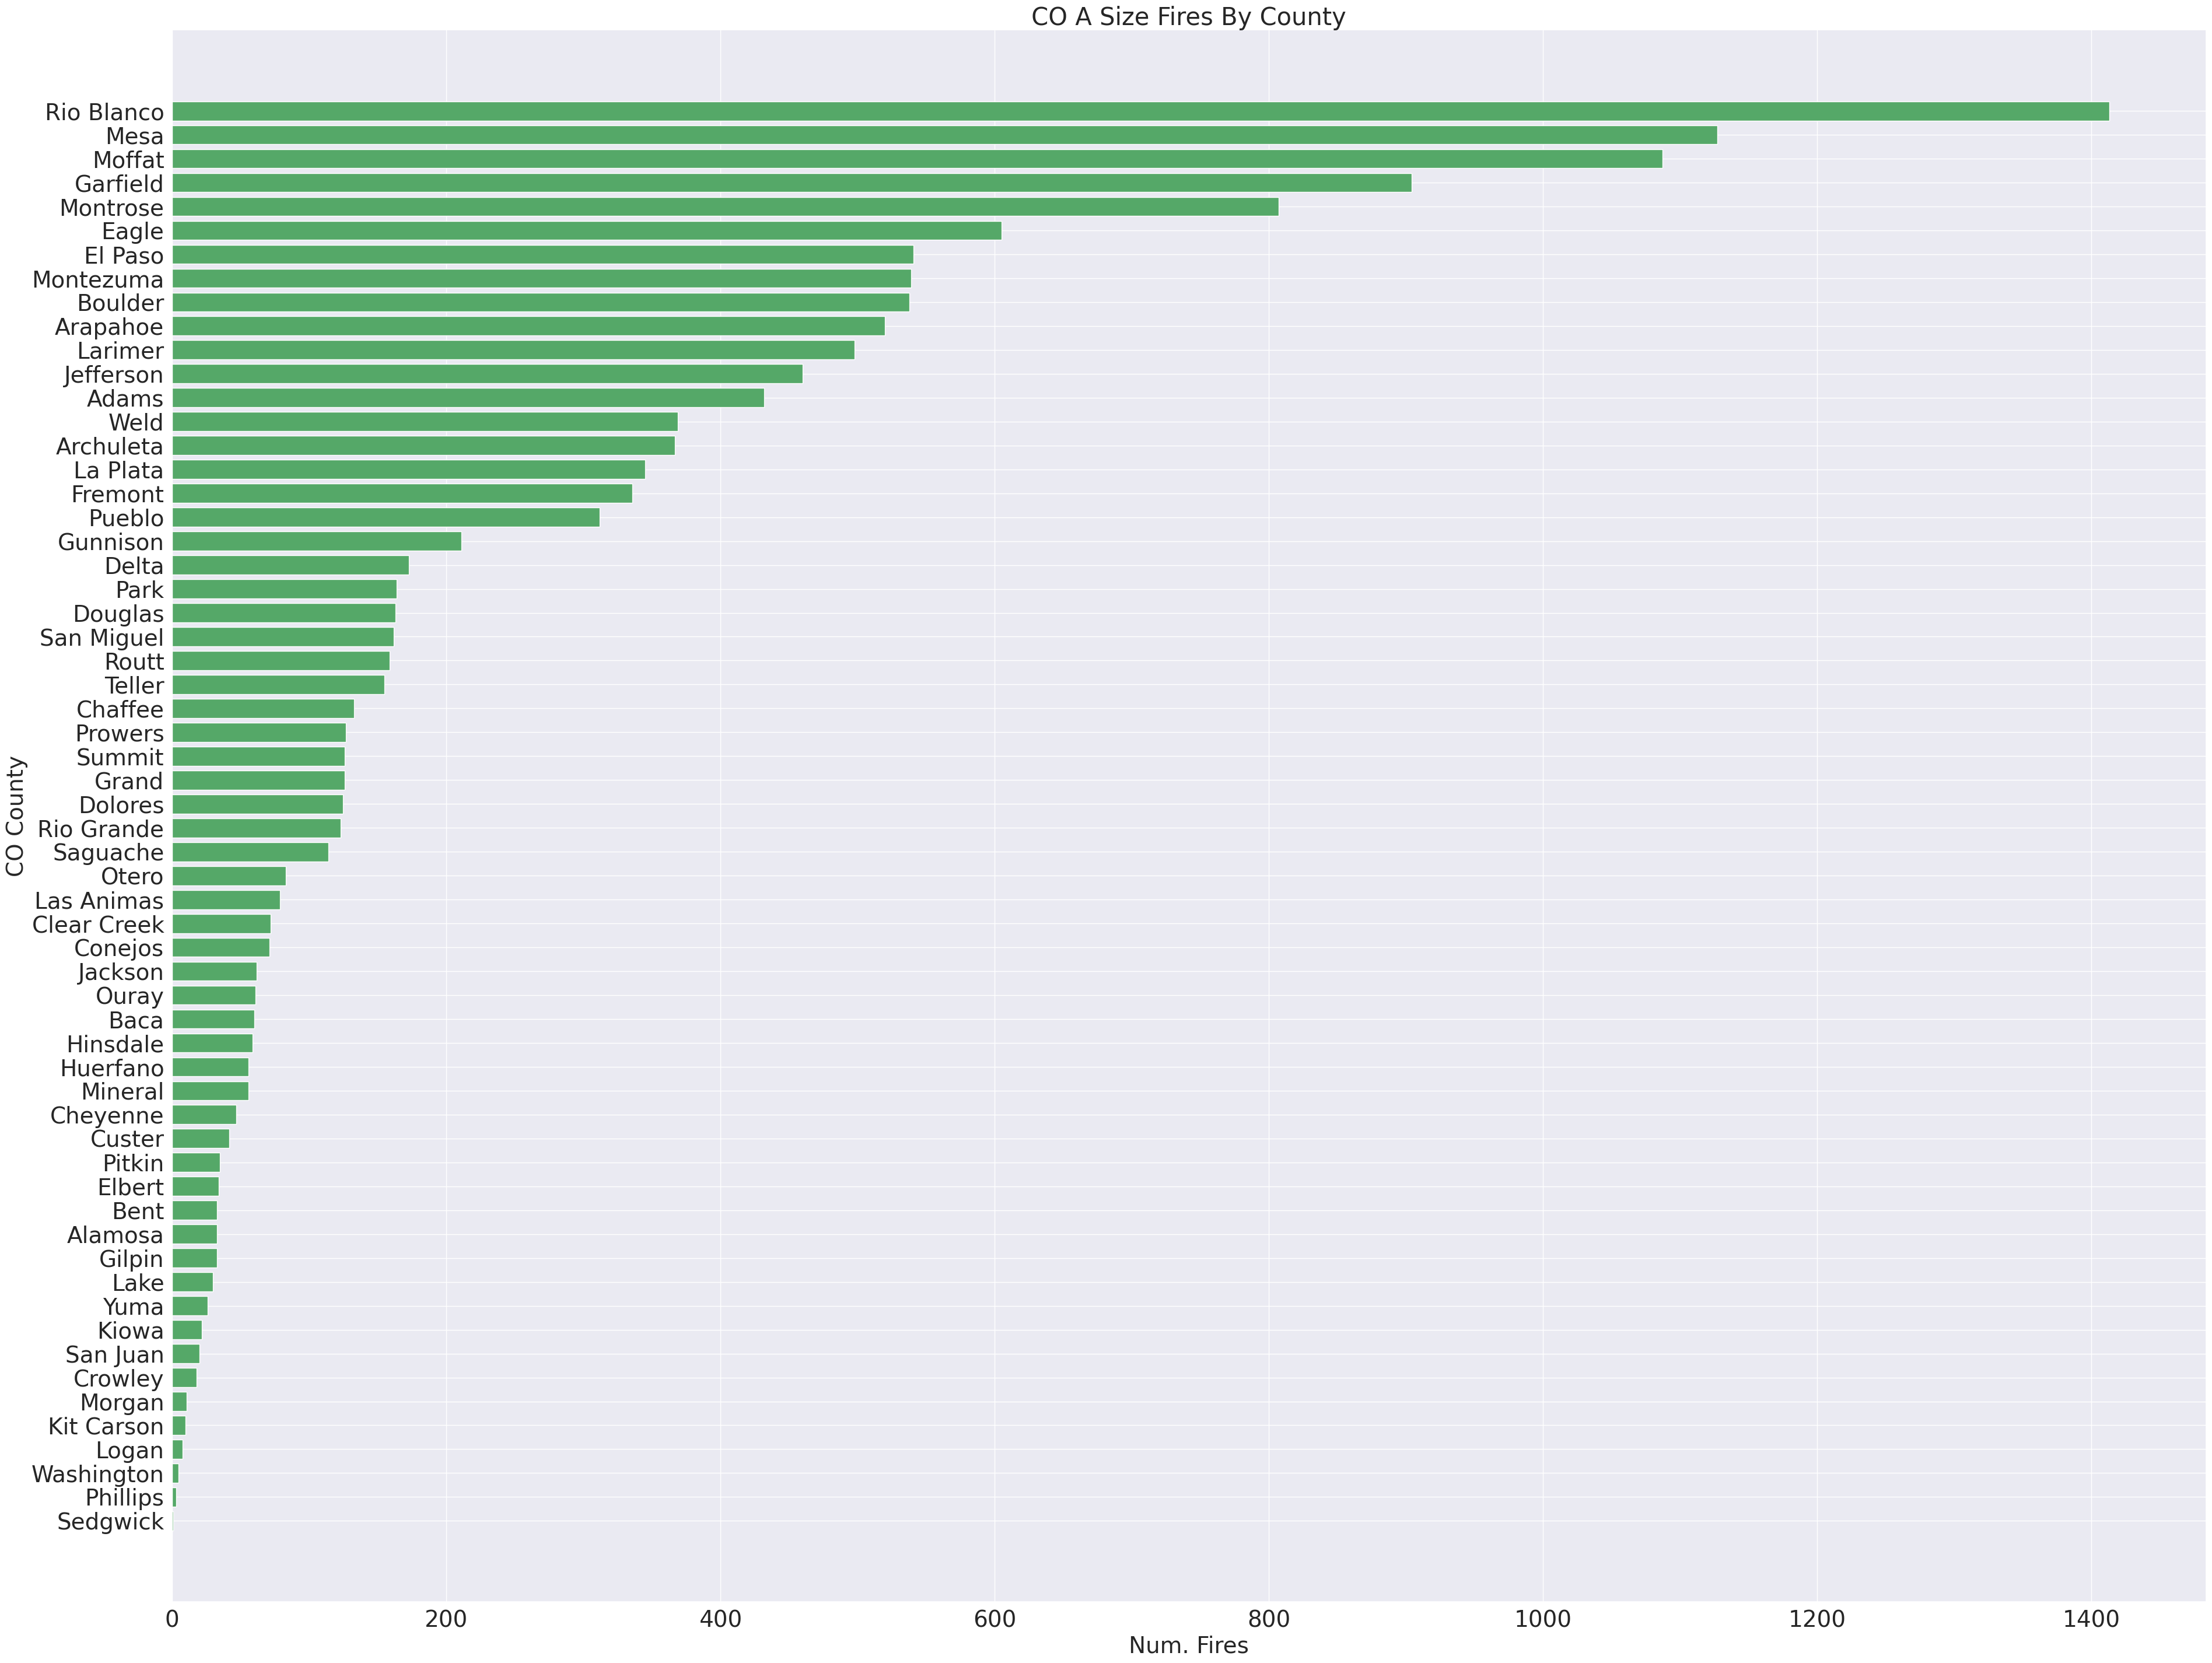

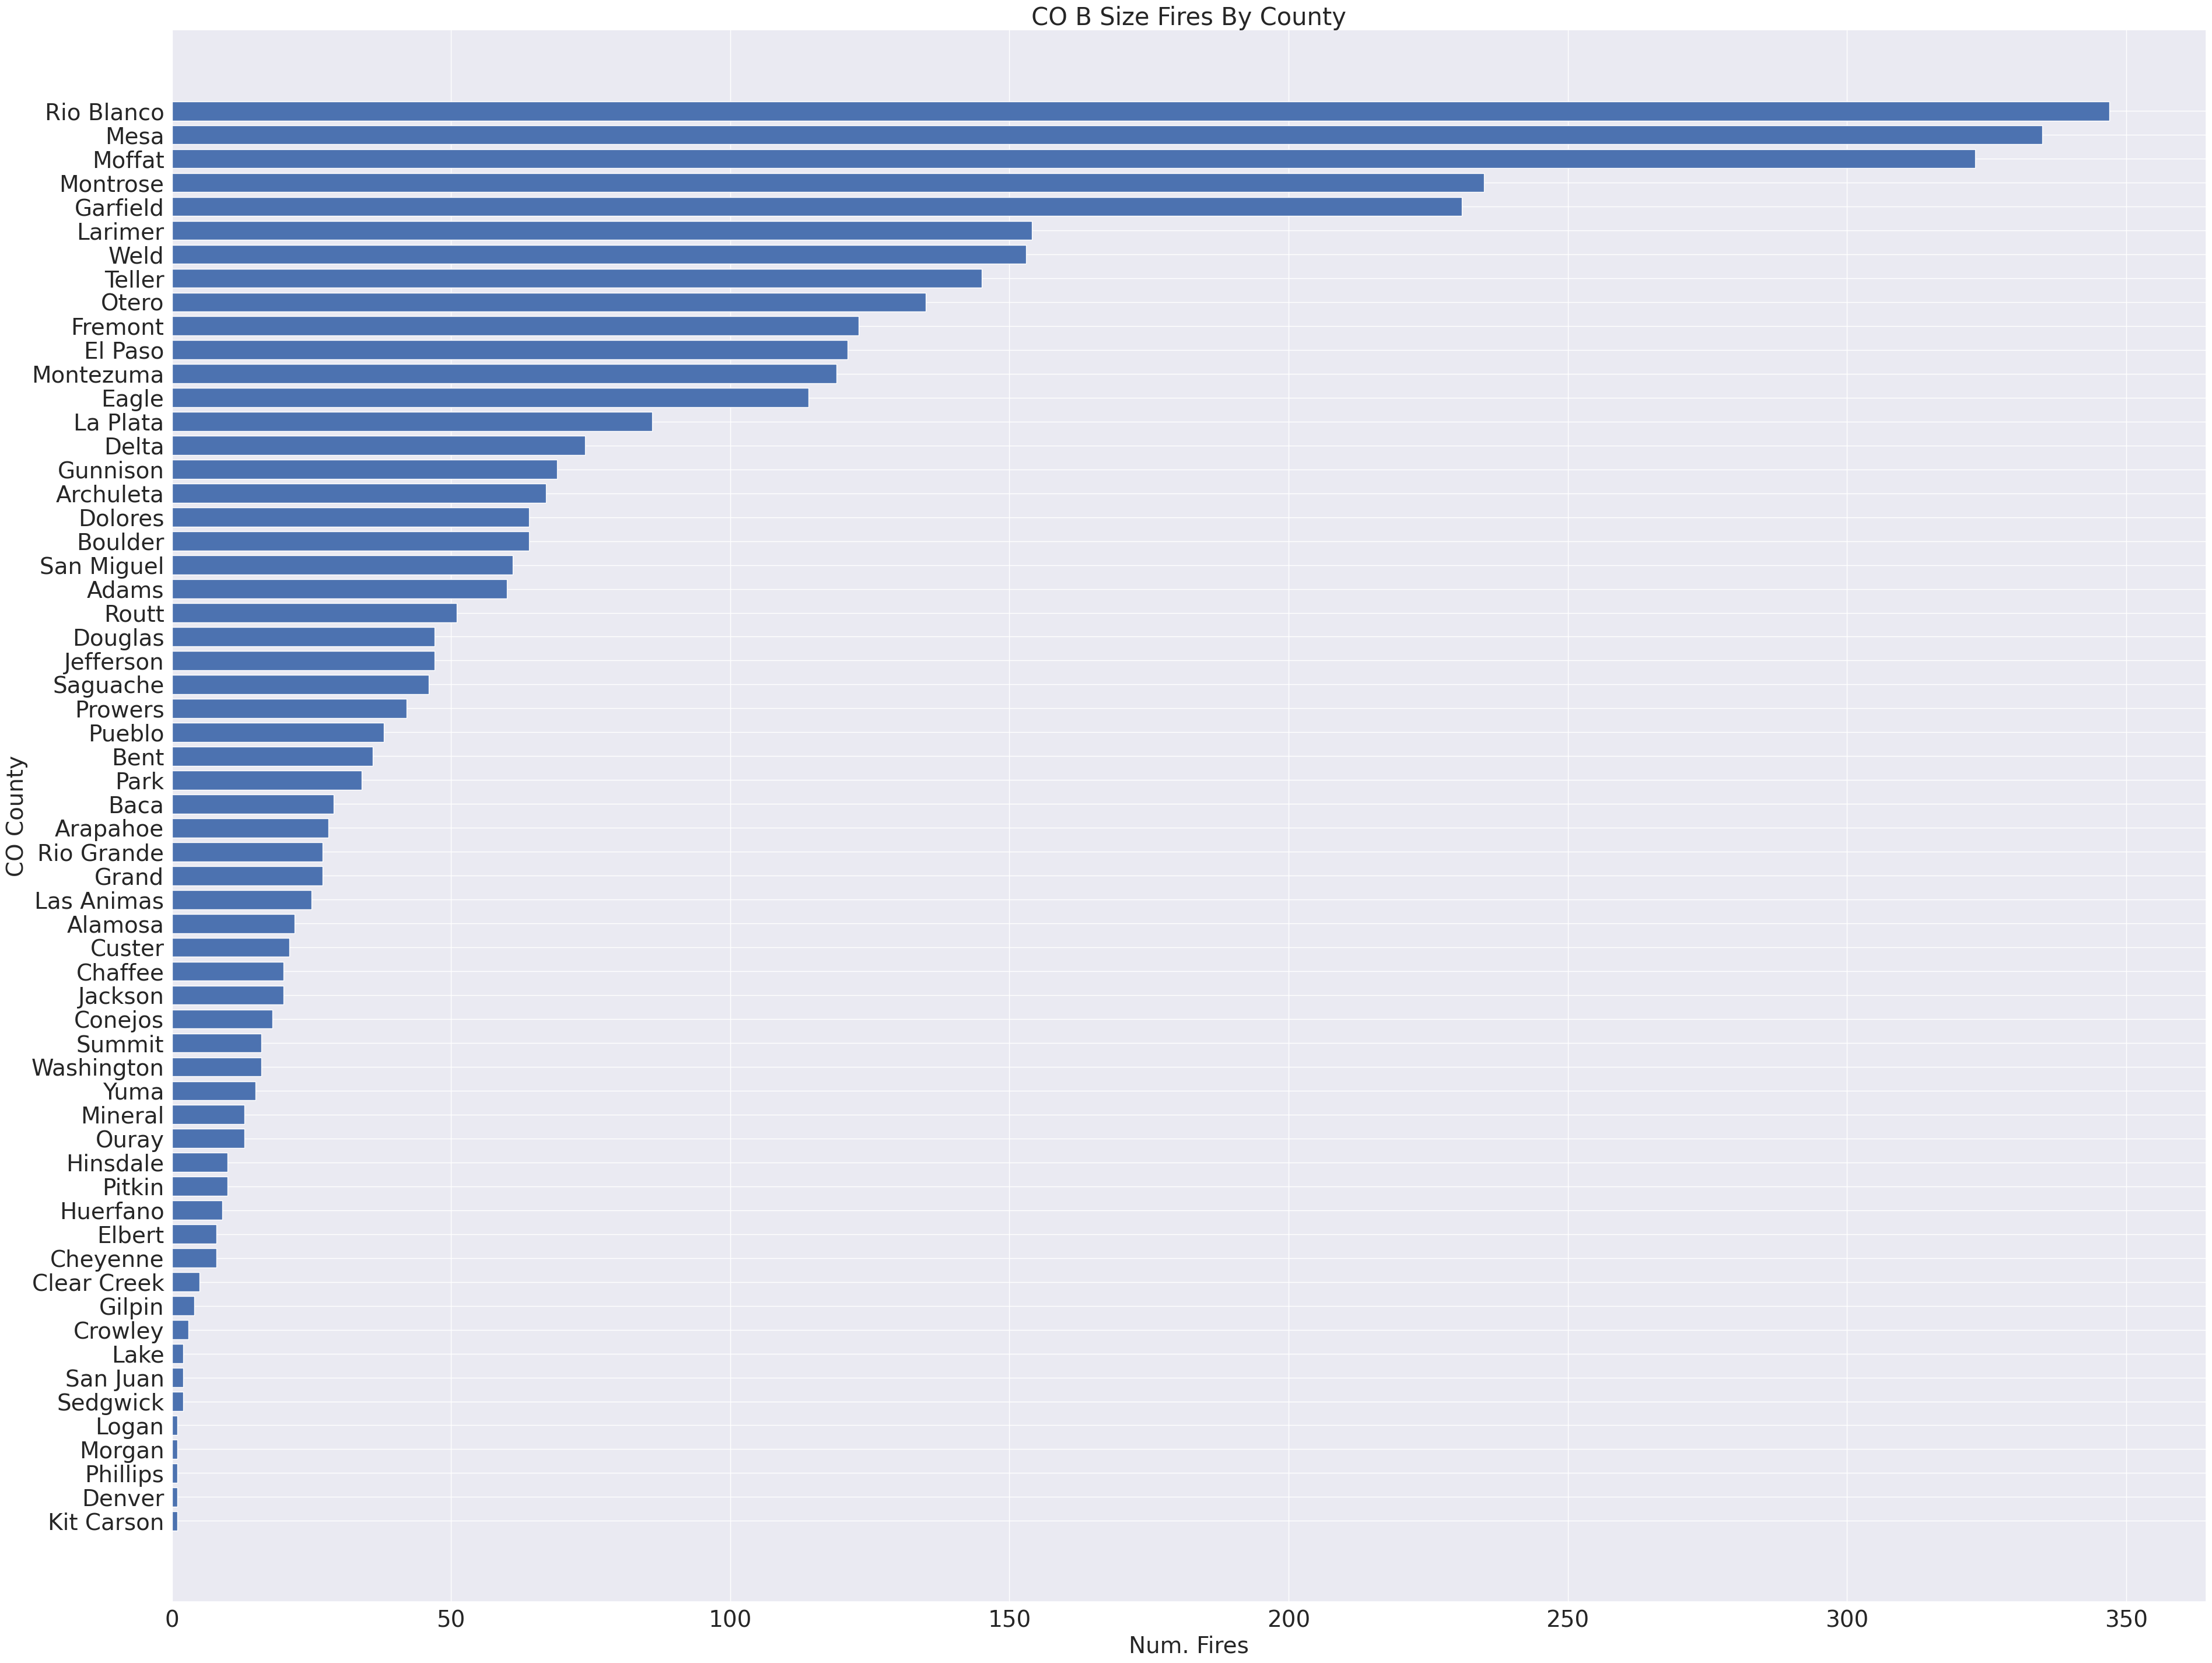

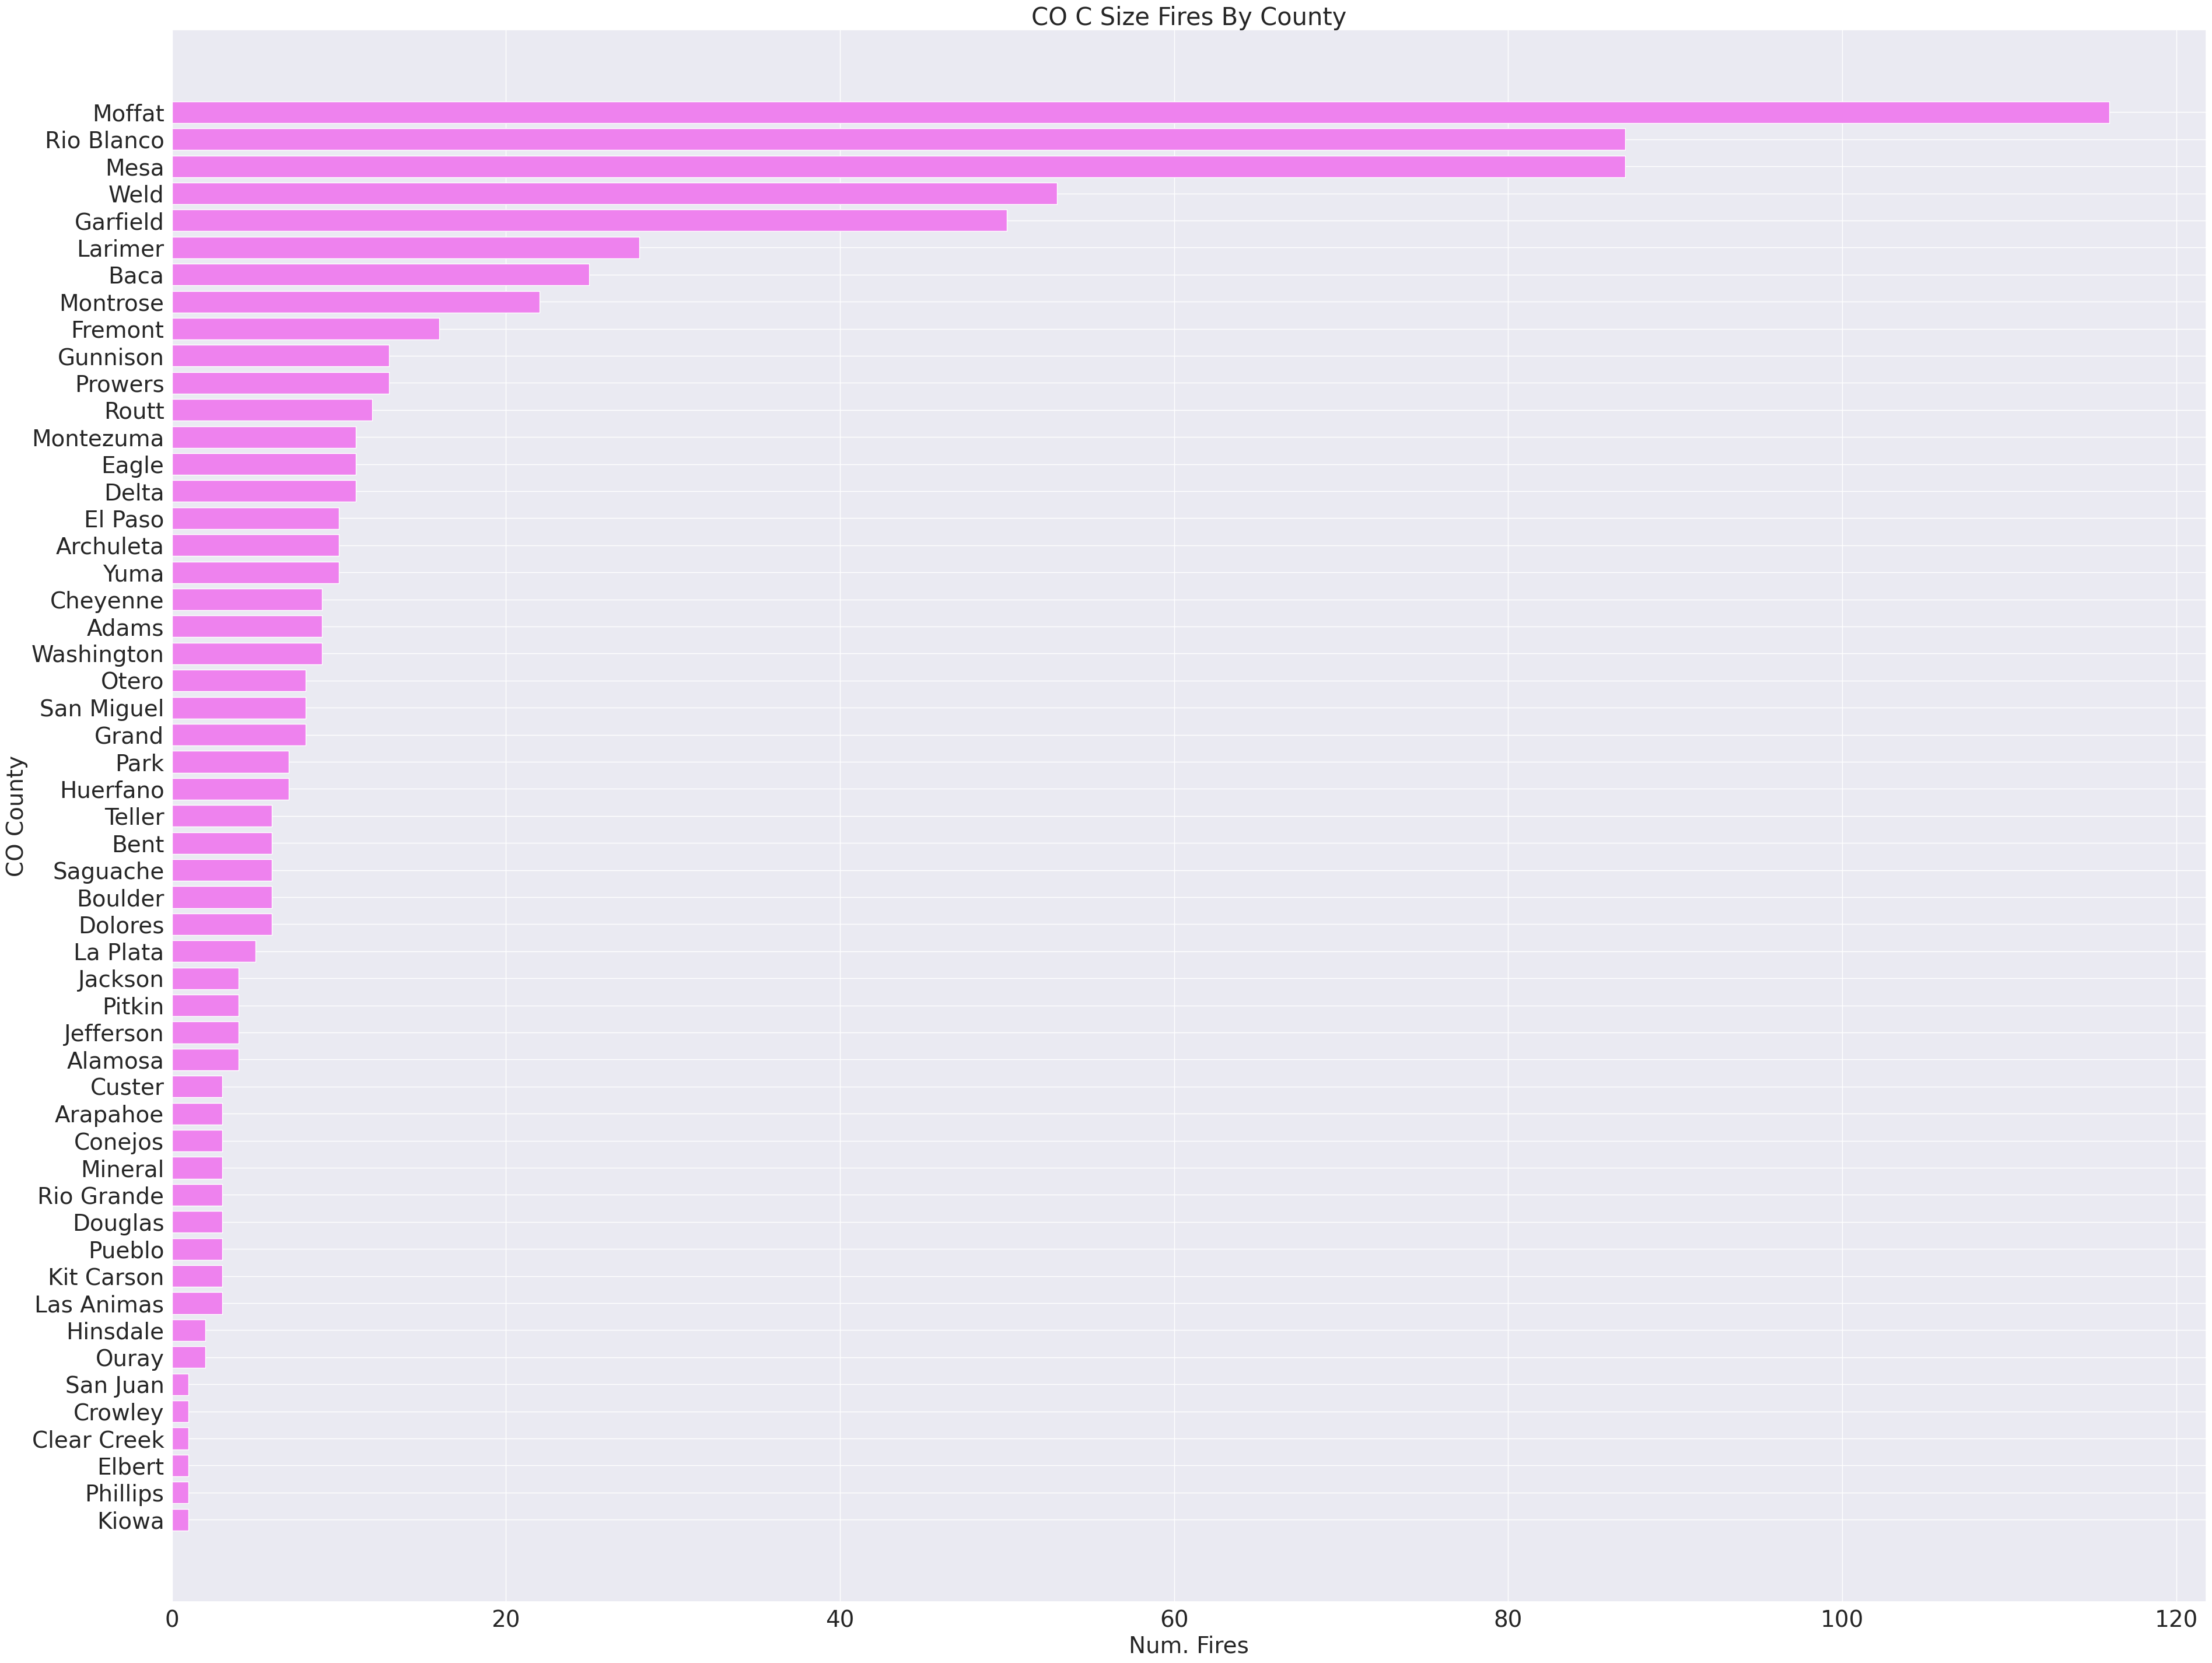

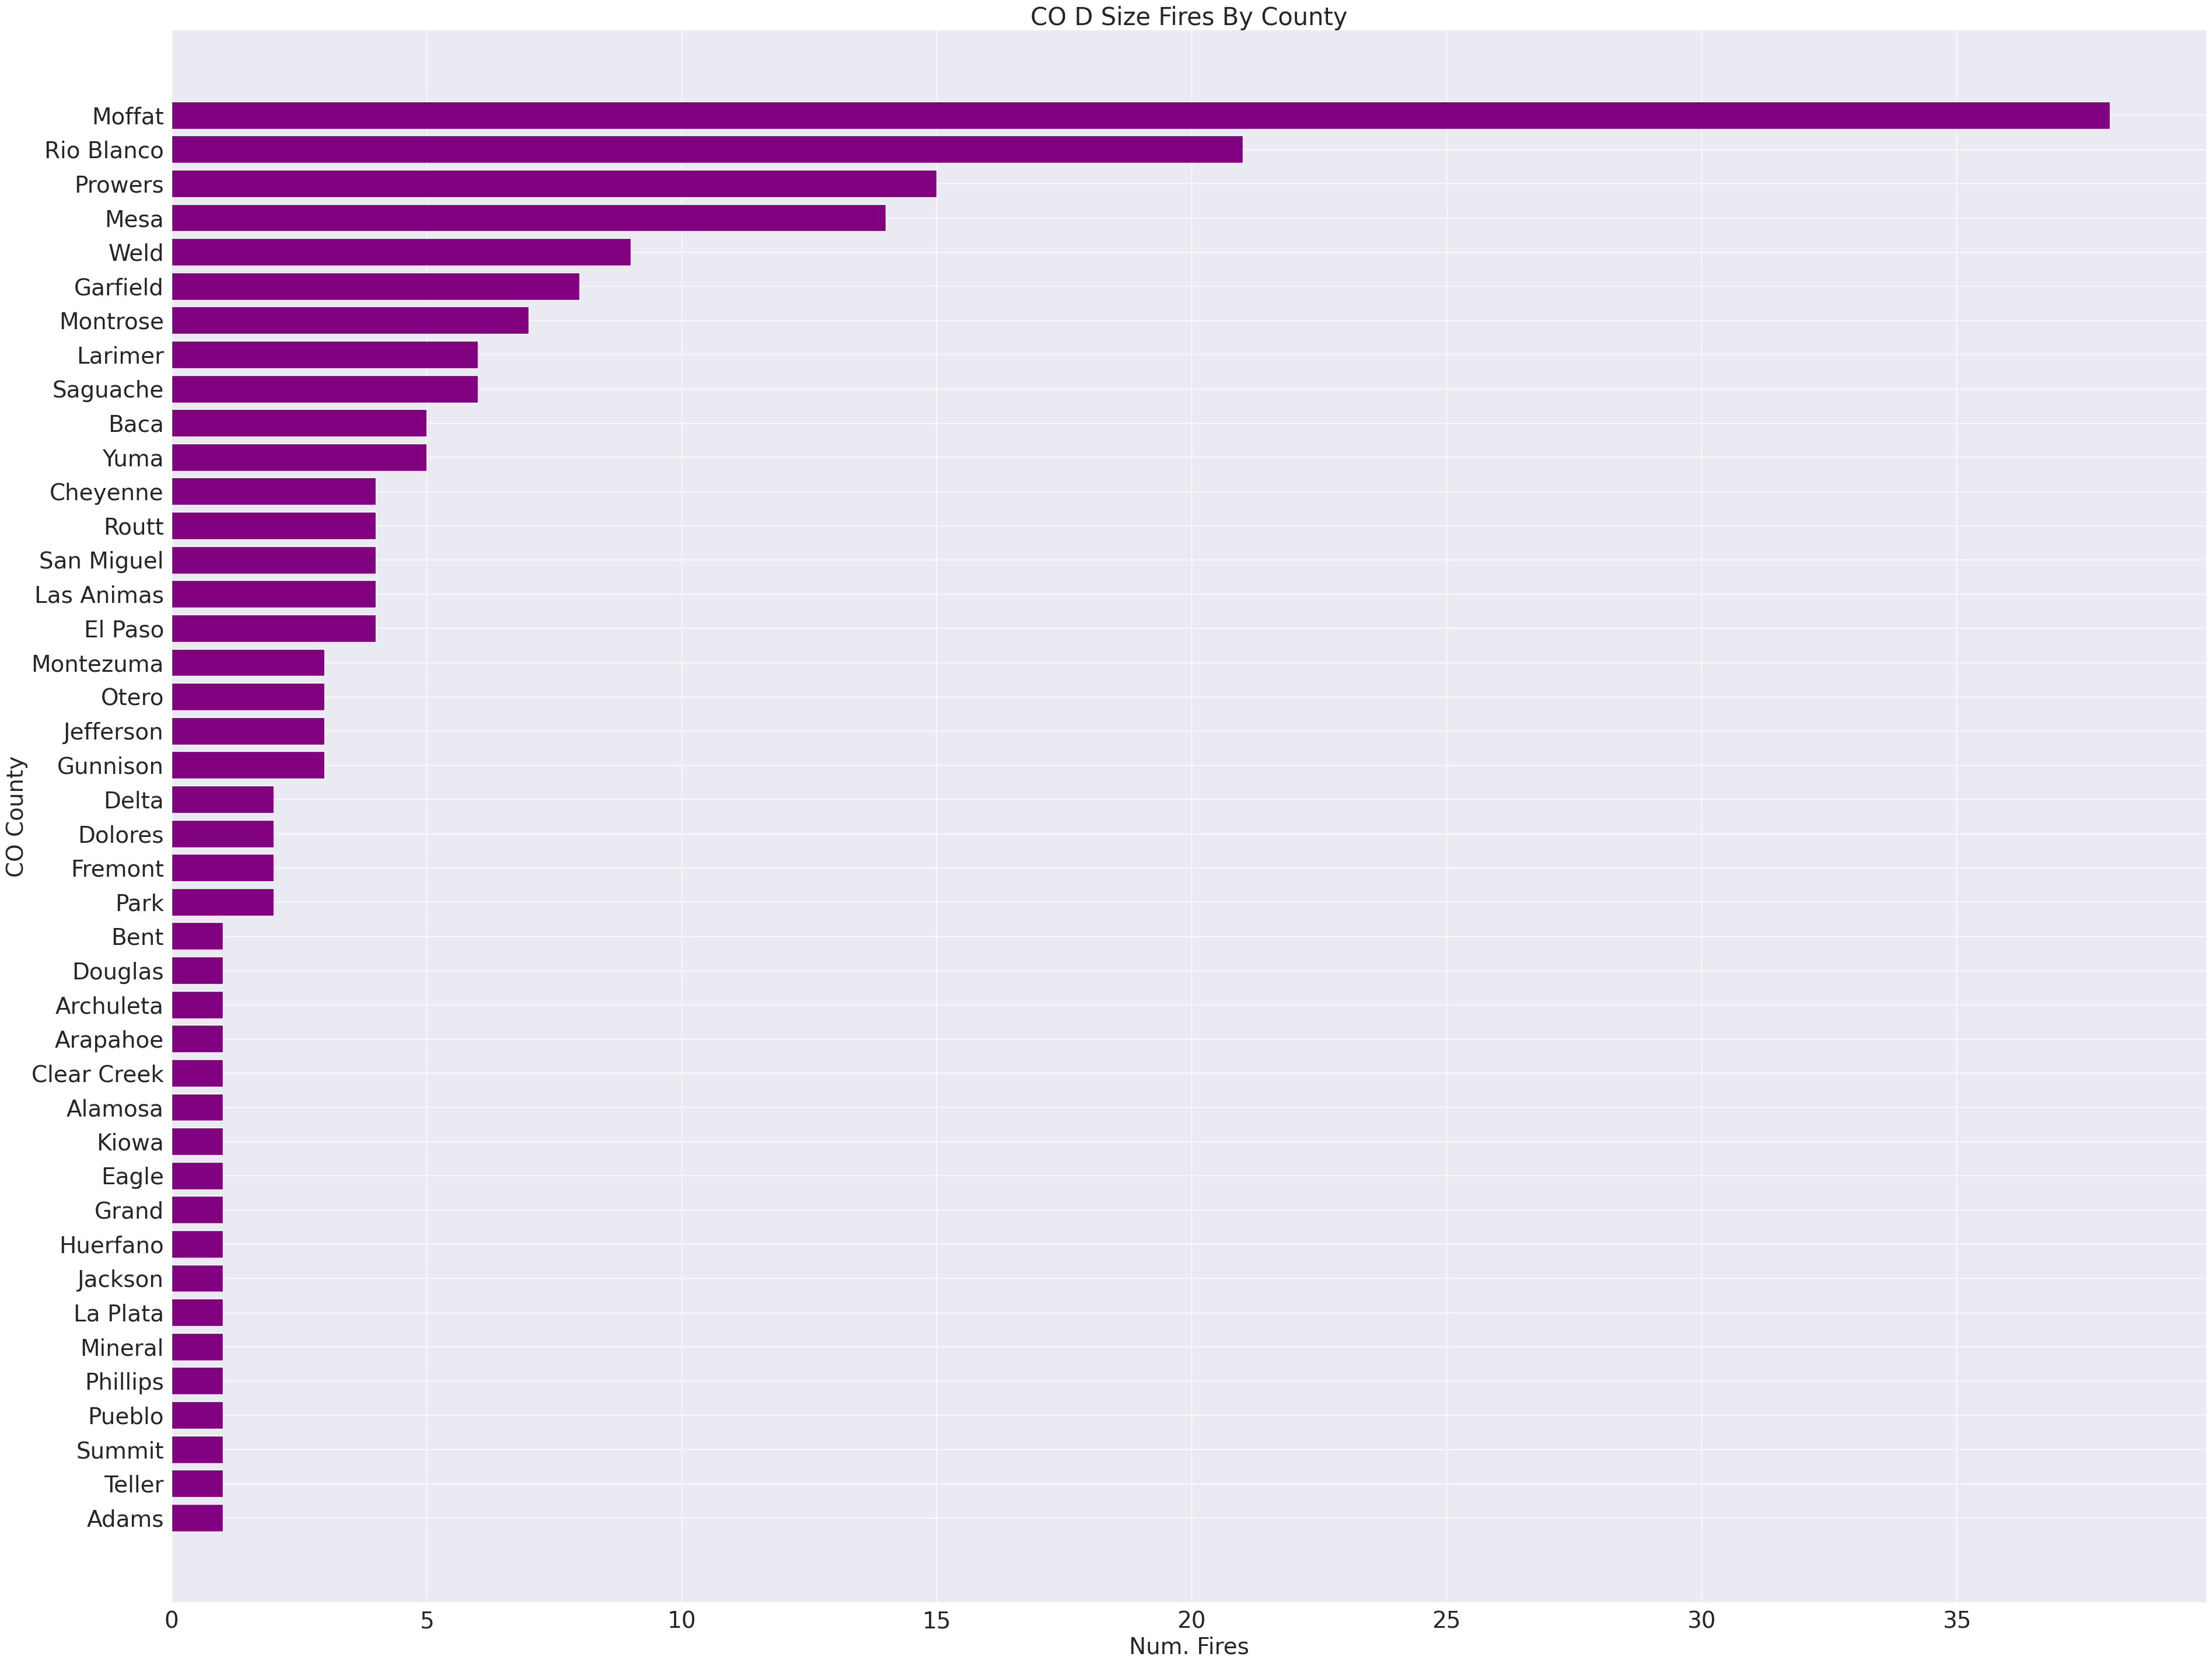

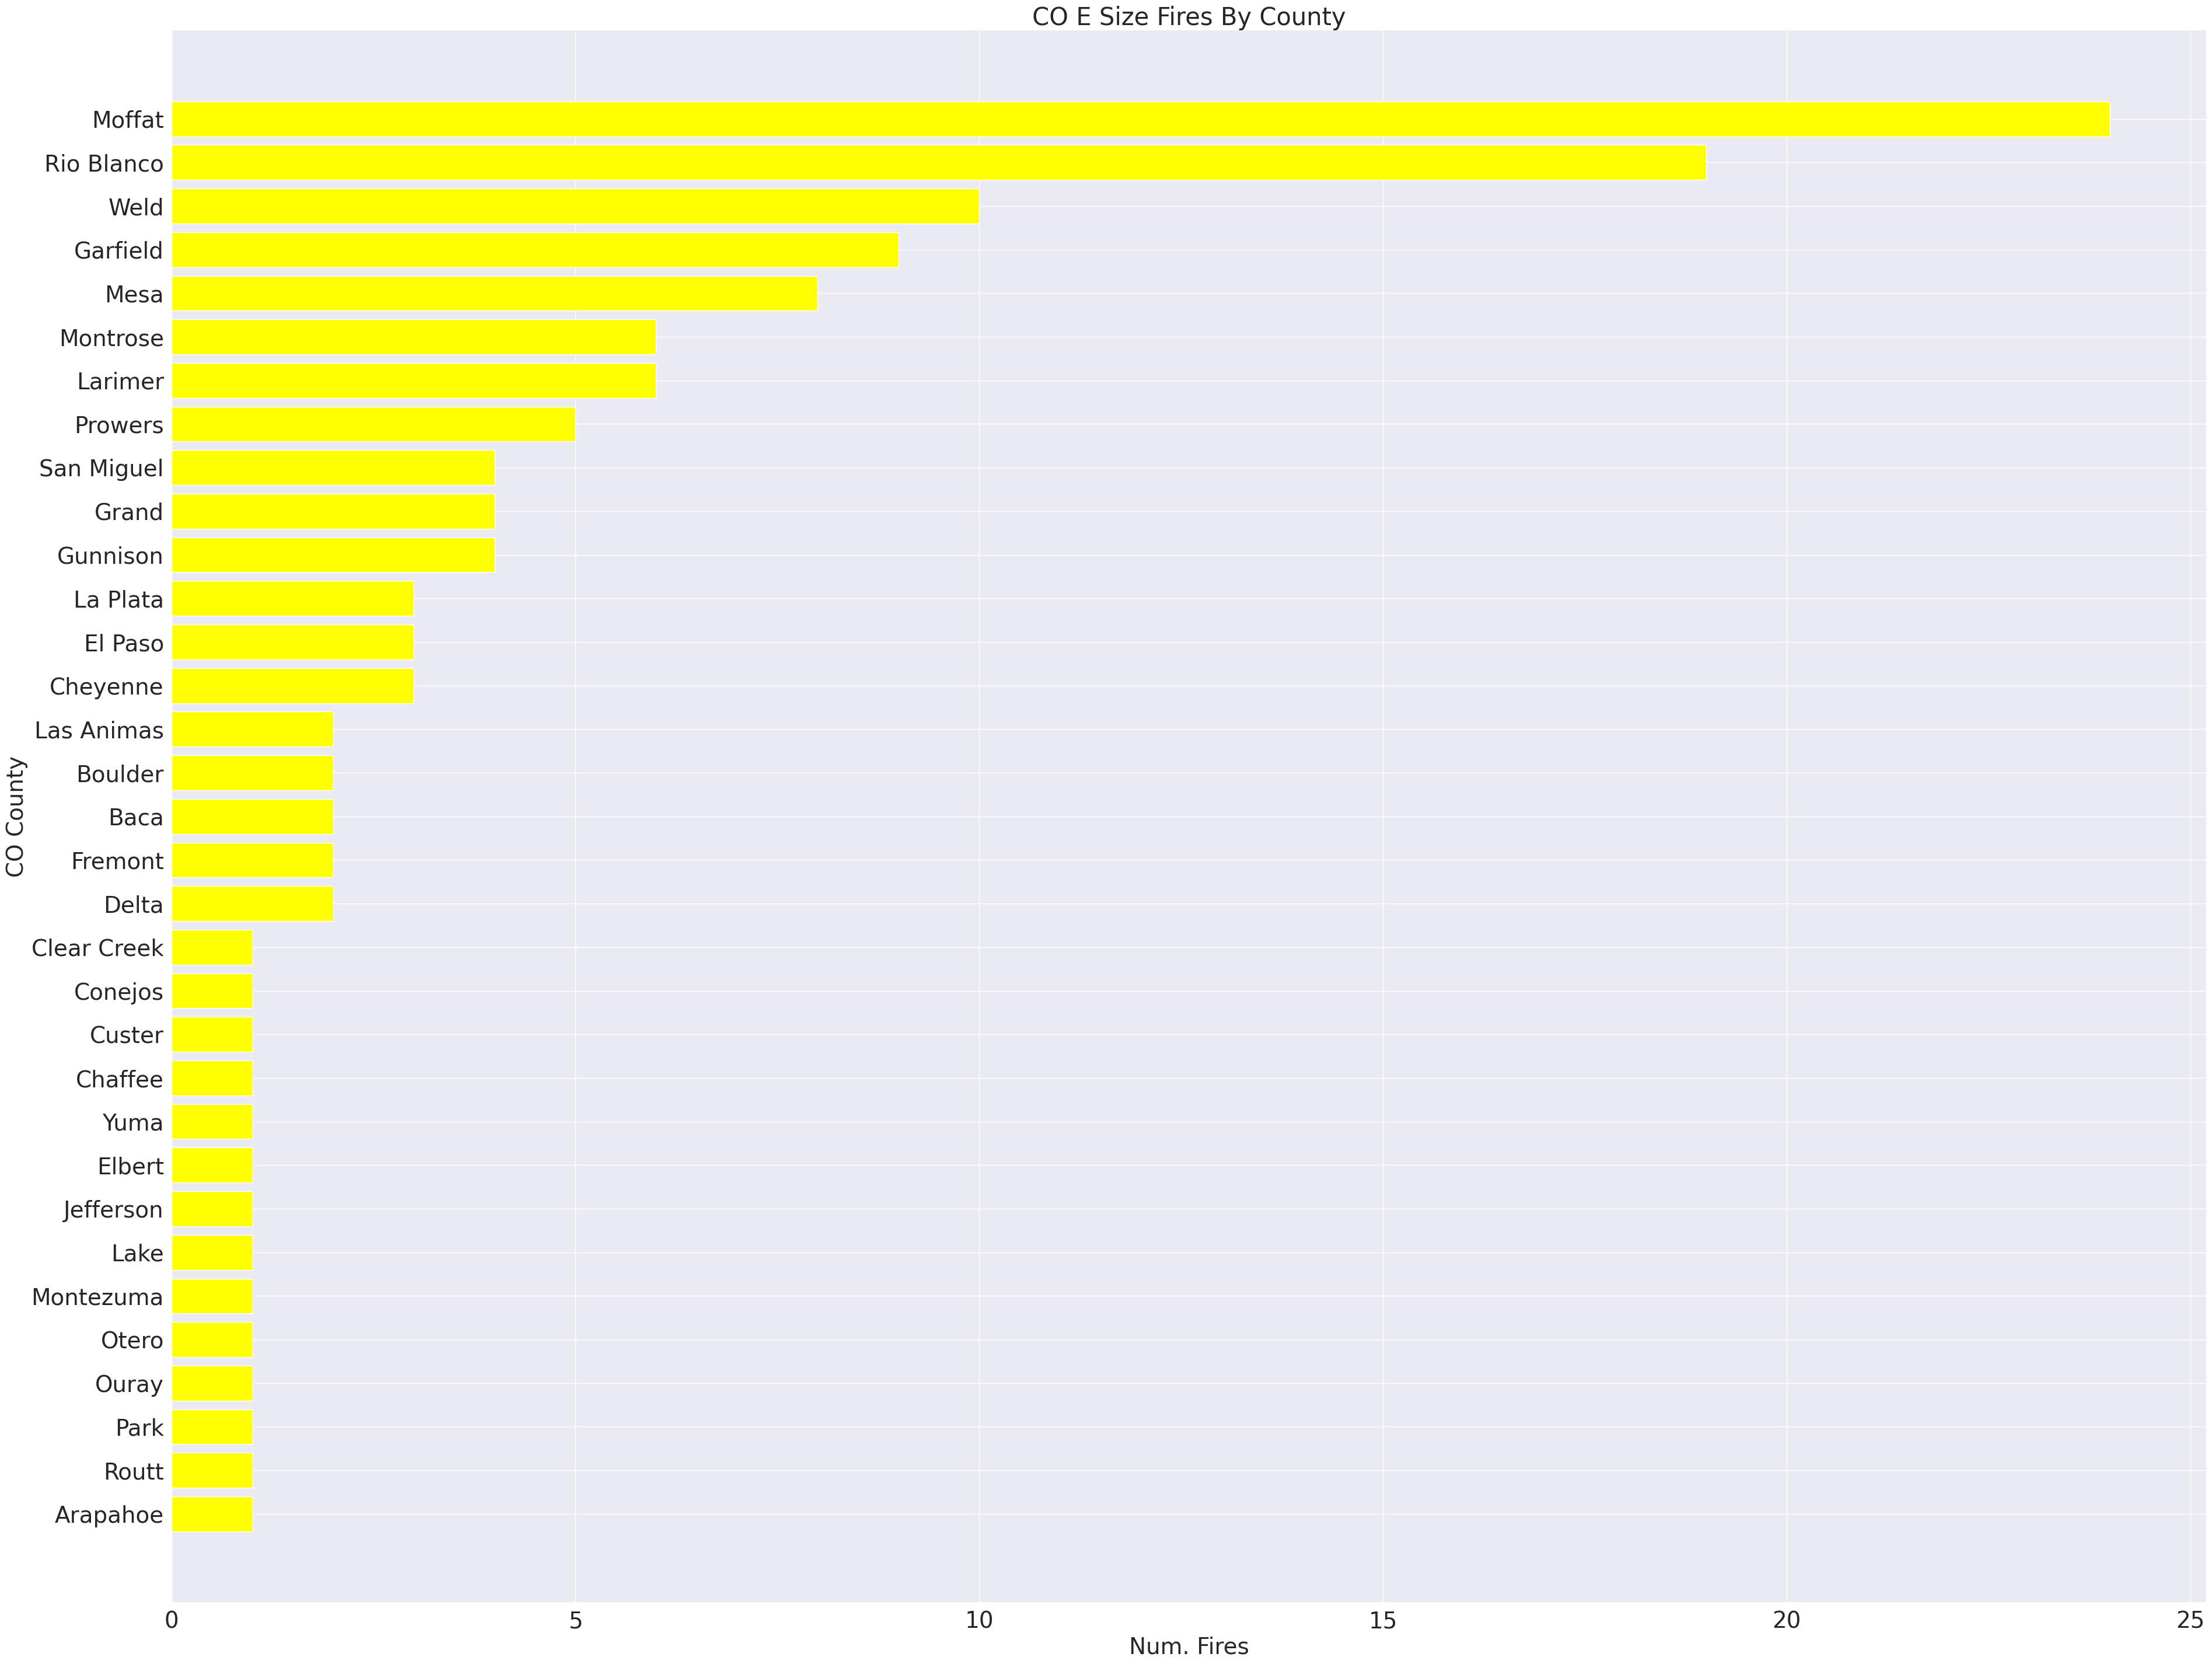

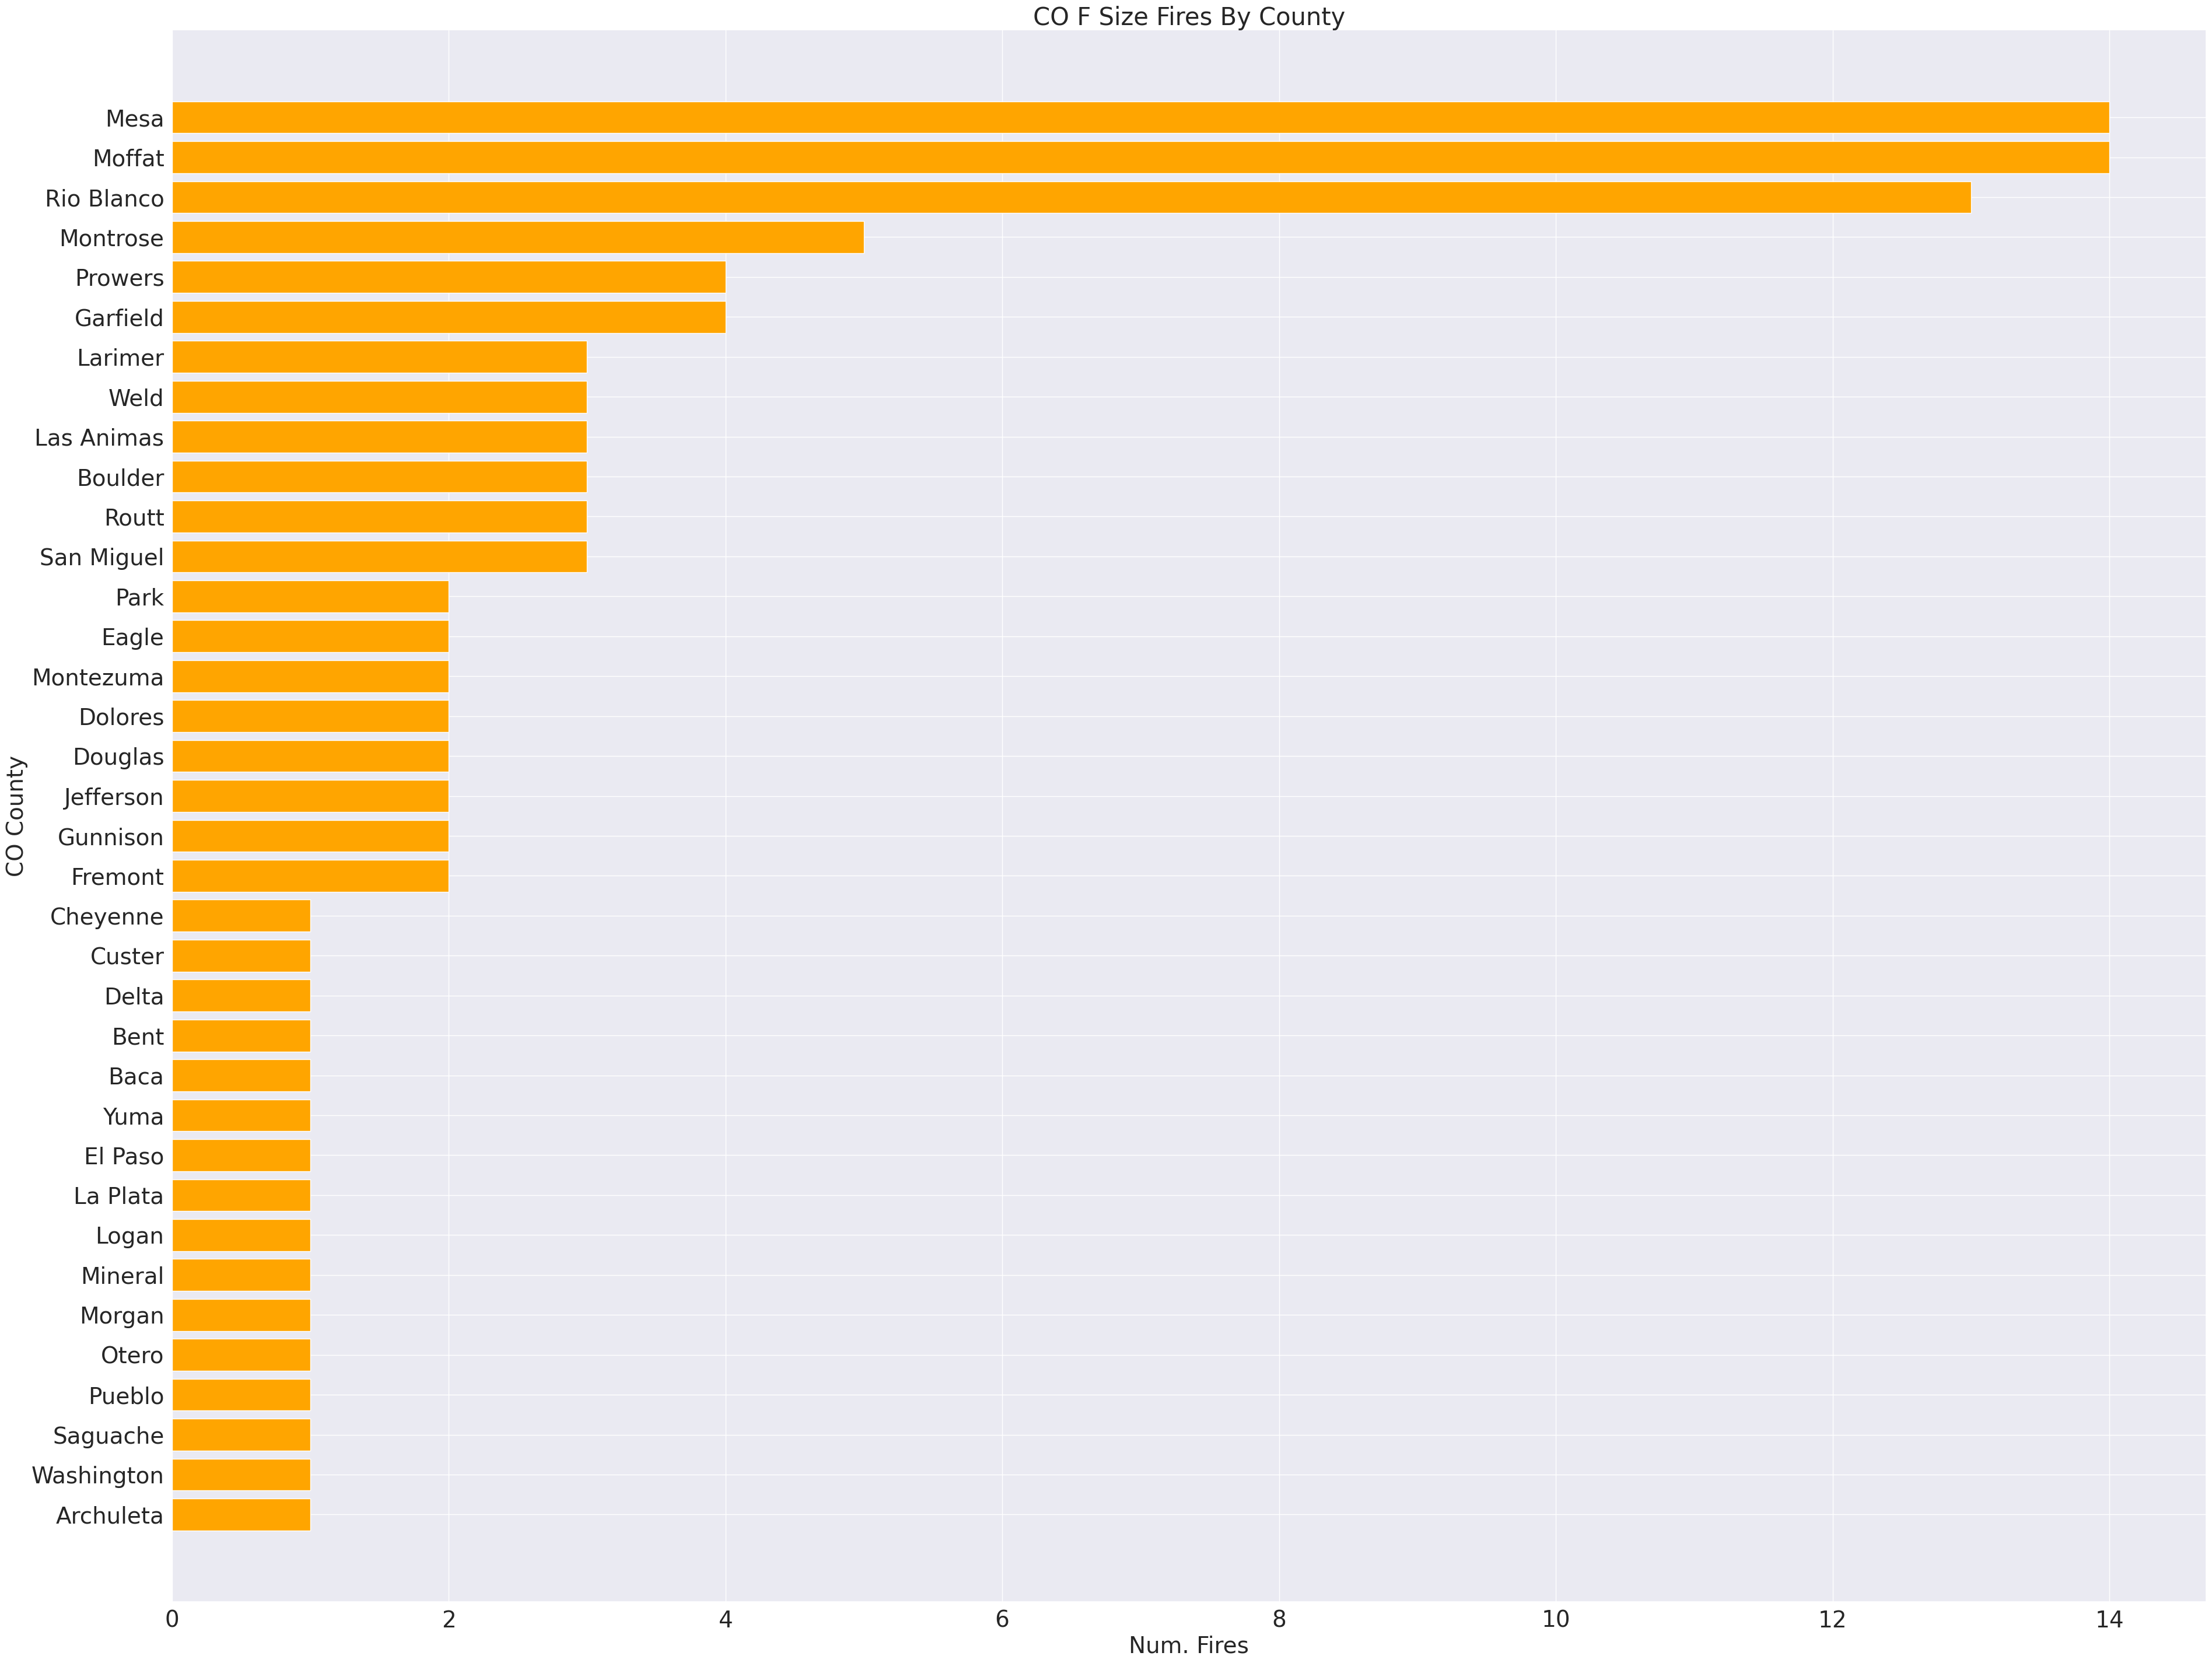

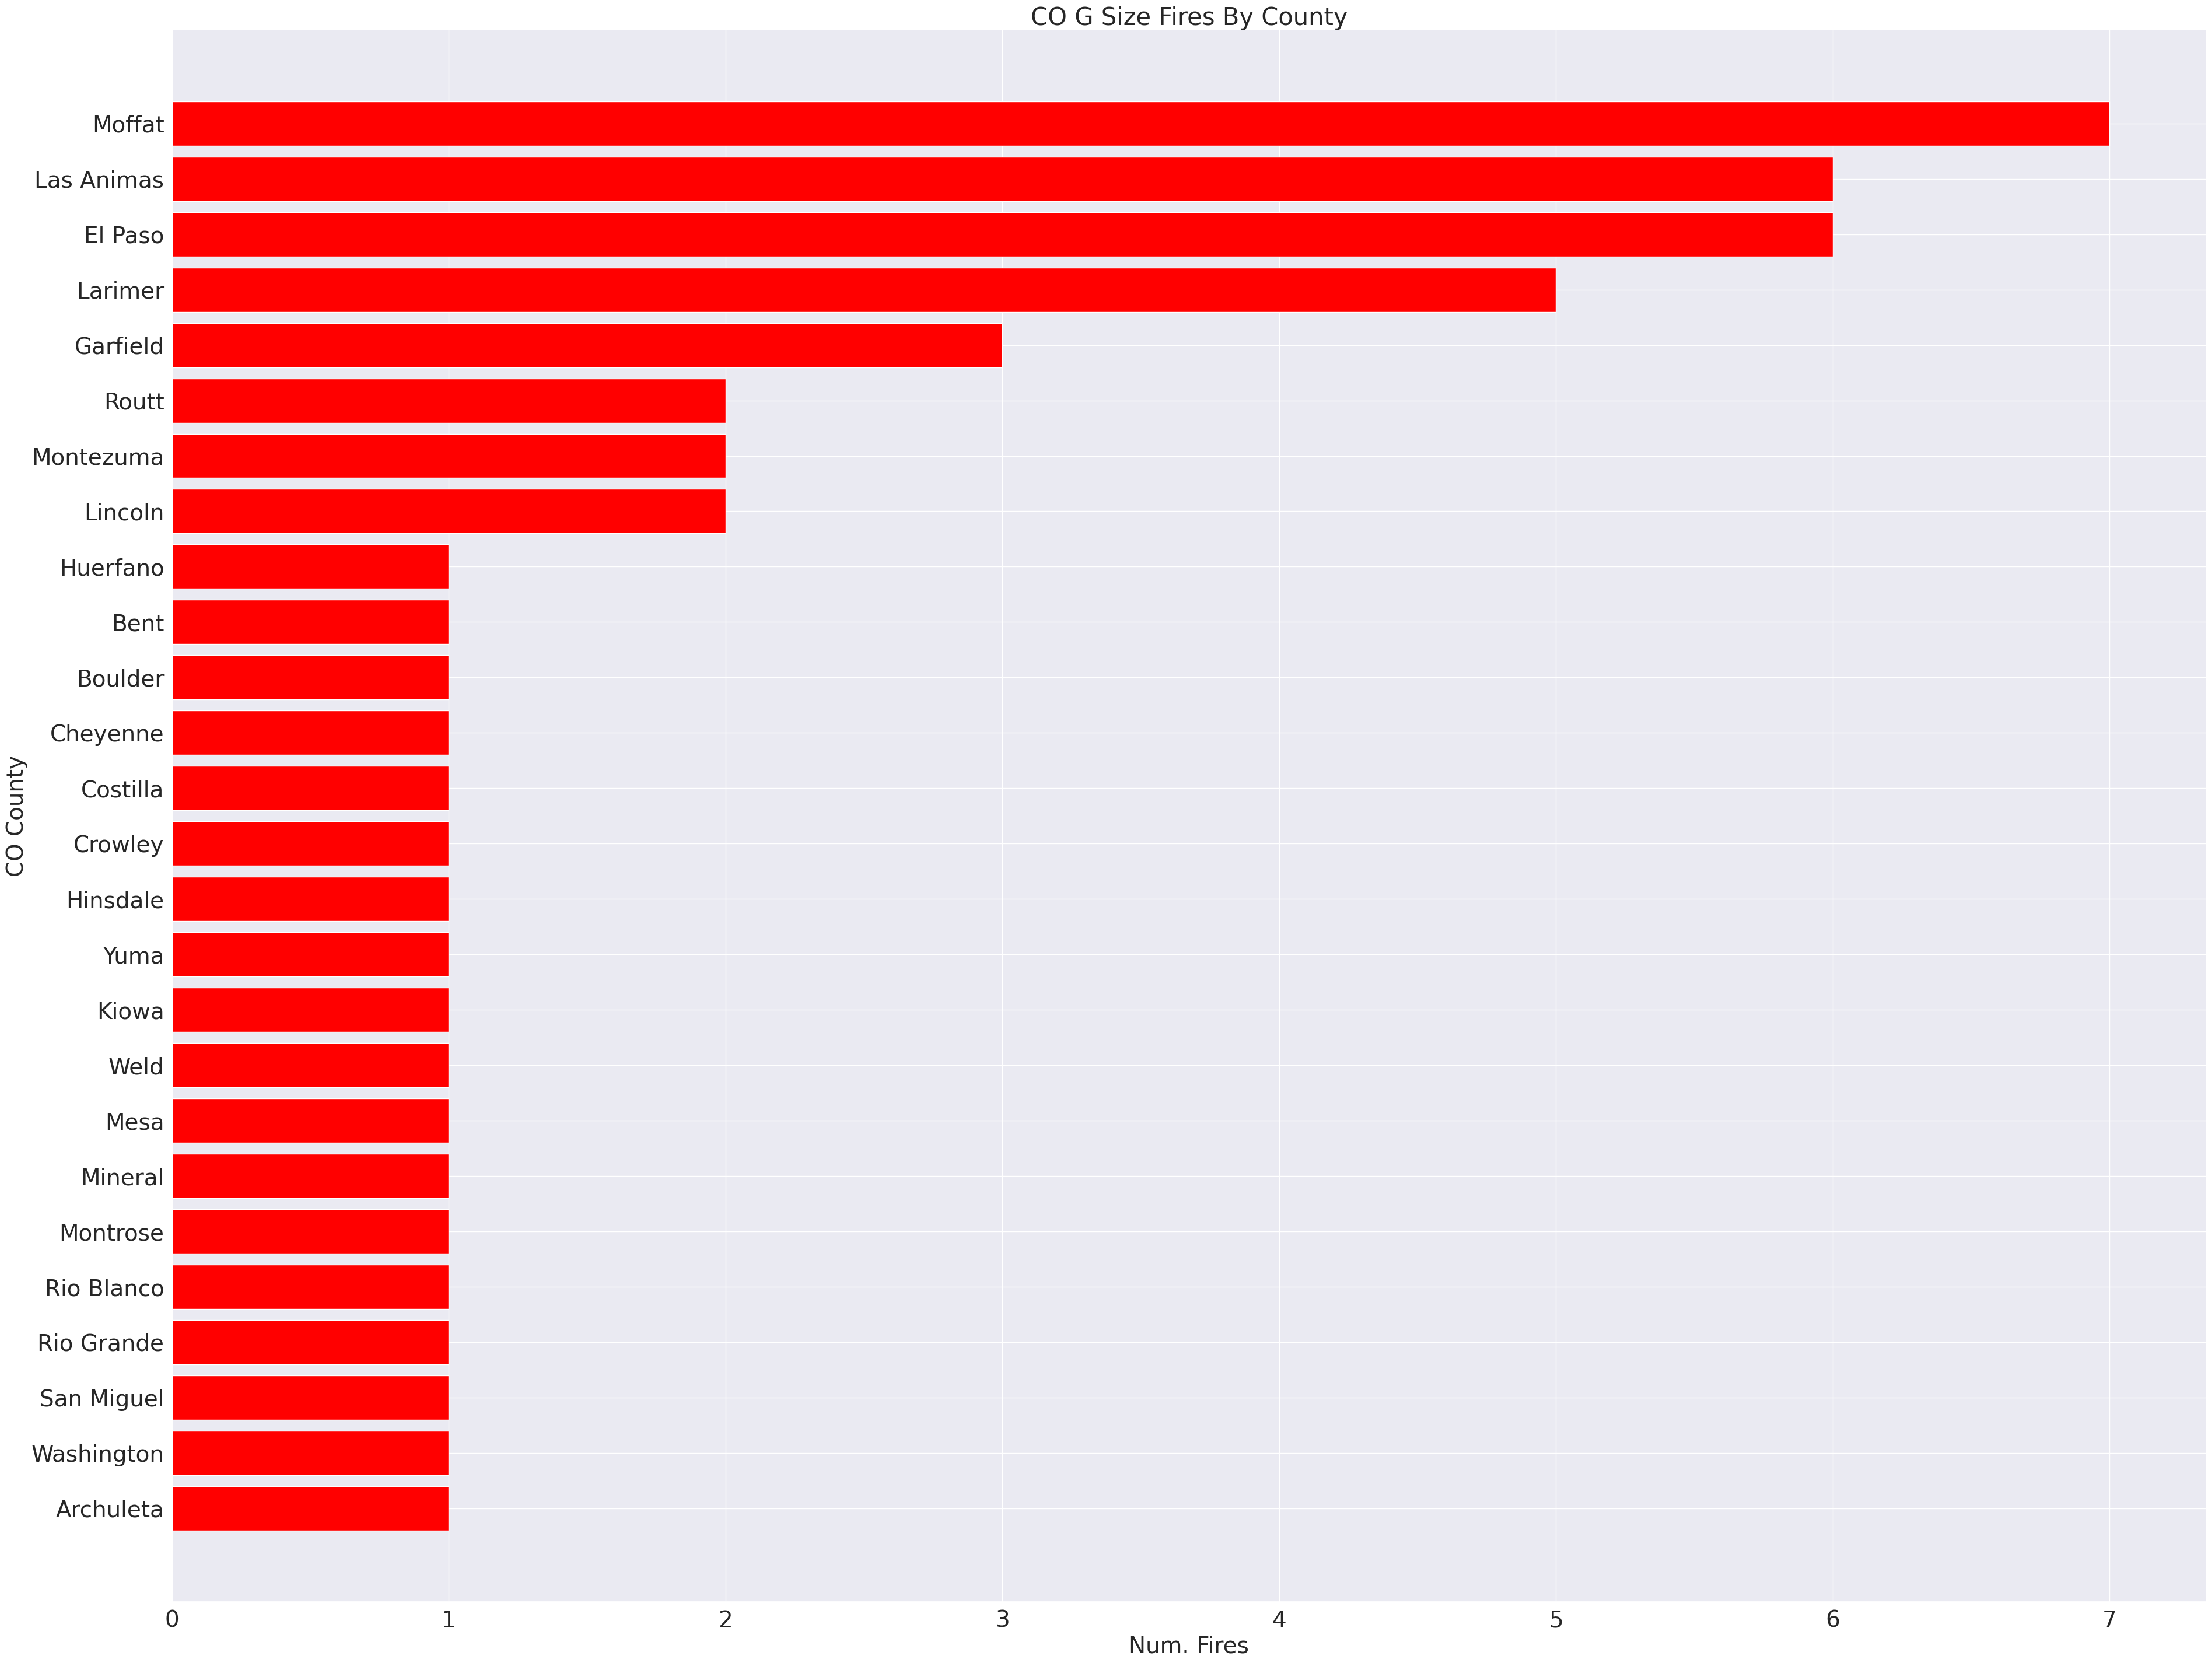

In [37]:
plt.figure(figsize=(45,35))
plt.title("CO A Size Fires By County", fontsize = 30)
plt.xlabel("Num. Fires", fontsize = 28)
plt.ylabel("CO County", fontsize = 28)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.barh(AFires['FIPS_NAME'], AFires['FOD_ID'], color = 'g')
plt.show()
plt.figure(figsize=(45,35))
plt.title("CO B Size Fires By County", fontsize = 30)
plt.xlabel("Num. Fires", fontsize = 28)
plt.ylabel("CO County", fontsize = 28)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.barh(BFires['FIPS_NAME'], BFires['FOD_ID'], color = 'b')
plt.show()
plt.figure(figsize=(45,35))
plt.title("CO C Size Fires By County", fontsize = 30)
plt.xlabel("Num. Fires", fontsize = 28)
plt.ylabel("CO County", fontsize = 28)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.barh(CFires['FIPS_NAME'], CFires['FOD_ID'], color = 'violet')
plt.show()
plt.figure(figsize=(45,35))
plt.title("CO D Size Fires By County", fontsize = 30)
plt.xlabel("Num. Fires", fontsize = 28)
plt.ylabel("CO County", fontsize = 28)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.barh(DFires['FIPS_NAME'], DFires['FOD_ID'], color = 'purple')
plt.show()
plt.figure(figsize=(45,35))
plt.title("CO E Size Fires By County", fontsize = 30)
plt.xlabel("Num. Fires", fontsize = 28)
plt.ylabel("CO County", fontsize = 28)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.barh(EFires['FIPS_NAME'], EFires['FOD_ID'], color = 'yellow')
plt.show()
plt.figure(figsize=(45,35))
plt.title("CO F Size Fires By County", fontsize = 30)
plt.xlabel("Num. Fires", fontsize = 28)
plt.ylabel("CO County", fontsize = 28)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.barh(FFires['FIPS_NAME'], FFires['FOD_ID'], color = 'orange')
plt.show()
plt.figure(figsize=(45,35))
plt.title("CO G Size Fires By County", fontsize = 30)
plt.xlabel("Num. Fires", fontsize = 28)
plt.ylabel("CO County", fontsize = 28)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.barh(GFires['FIPS_NAME'], GFires['FOD_ID'], color = 'red')
plt.show()

In [38]:
CoFires['DISCOVERY_DATE'][100:110]

100   2005-09-24
101   2005-07-31
102   2005-09-28
103   2005-06-13
104   2005-07-13
105   2005-10-08
106   2005-09-18
107   2005-09-19
108   2005-09-23
109   2005-05-18
Name: DISCOVERY_DATE, dtype: datetime64[ns]

In [39]:
CoFires['CONT_DATE'][100:110]

100   2005-09-25
101   2005-08-01
102   2005-09-30
103   2005-06-13
104   2005-07-13
105   2005-10-09
106   2005-09-18
107   2005-09-20
108   2005-09-26
109   2005-05-18
Name: CONT_DATE, dtype: datetime64[ns]

In [40]:
FireDur = []
for i in range(0,CoFires.shape[0]):
    FireDur.append(CoFires['CONT_DATE'][i] - CoFires['DISCOVERY_DATE'][i])
CoFires['FIRE_DURATION_DAYS'] = FireDur

In [41]:
NameDur = CoFires.groupby(['FOD_ID','FIRE_NAME','FIRE_SIZE_CLASS']).FIRE_DURATION_DAYS.sum().sort_values(ascending = False)[0:10]

In [42]:
NameDur2 = pd.DataFrame(NameDur).reset_index()

In [43]:
NameDur2

FOD_ID         FIRE_NAME FIRE_SIZE_CLASS FIRE_DURATION_DAYS
0     332670    EAGLE ASSIST 5               A          1464 days
1    1271957        INDIAN RUN               D           366 days
2     361526           FALSE 1               A           186 days
3      31234      THRASH SHACK               A           184 days
4    1476790            MEDANO               G           178 days
5  201766356         WEST FORK               G           170 days
6    1476804         COW CREEK               F           167 days
7     329698        CURTIS CRK               A           155 days
8       4667  BUCK PARK #2 WFU               D           144 days
9     226042           SAWMILL               C           144 days

In [44]:
for i in range(0, NameDur2.shape[0]):
    NameDur2['FIRE_DURATION_DAYS'][i]= NameDur2['FIRE_DURATION_DAYS'][i].days

<ipython-input-44-5e5109947cf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NameDur2['FIRE_DURATION_DAYS'][i]= NameDur2['FIRE_DURATION_DAYS'][i].days


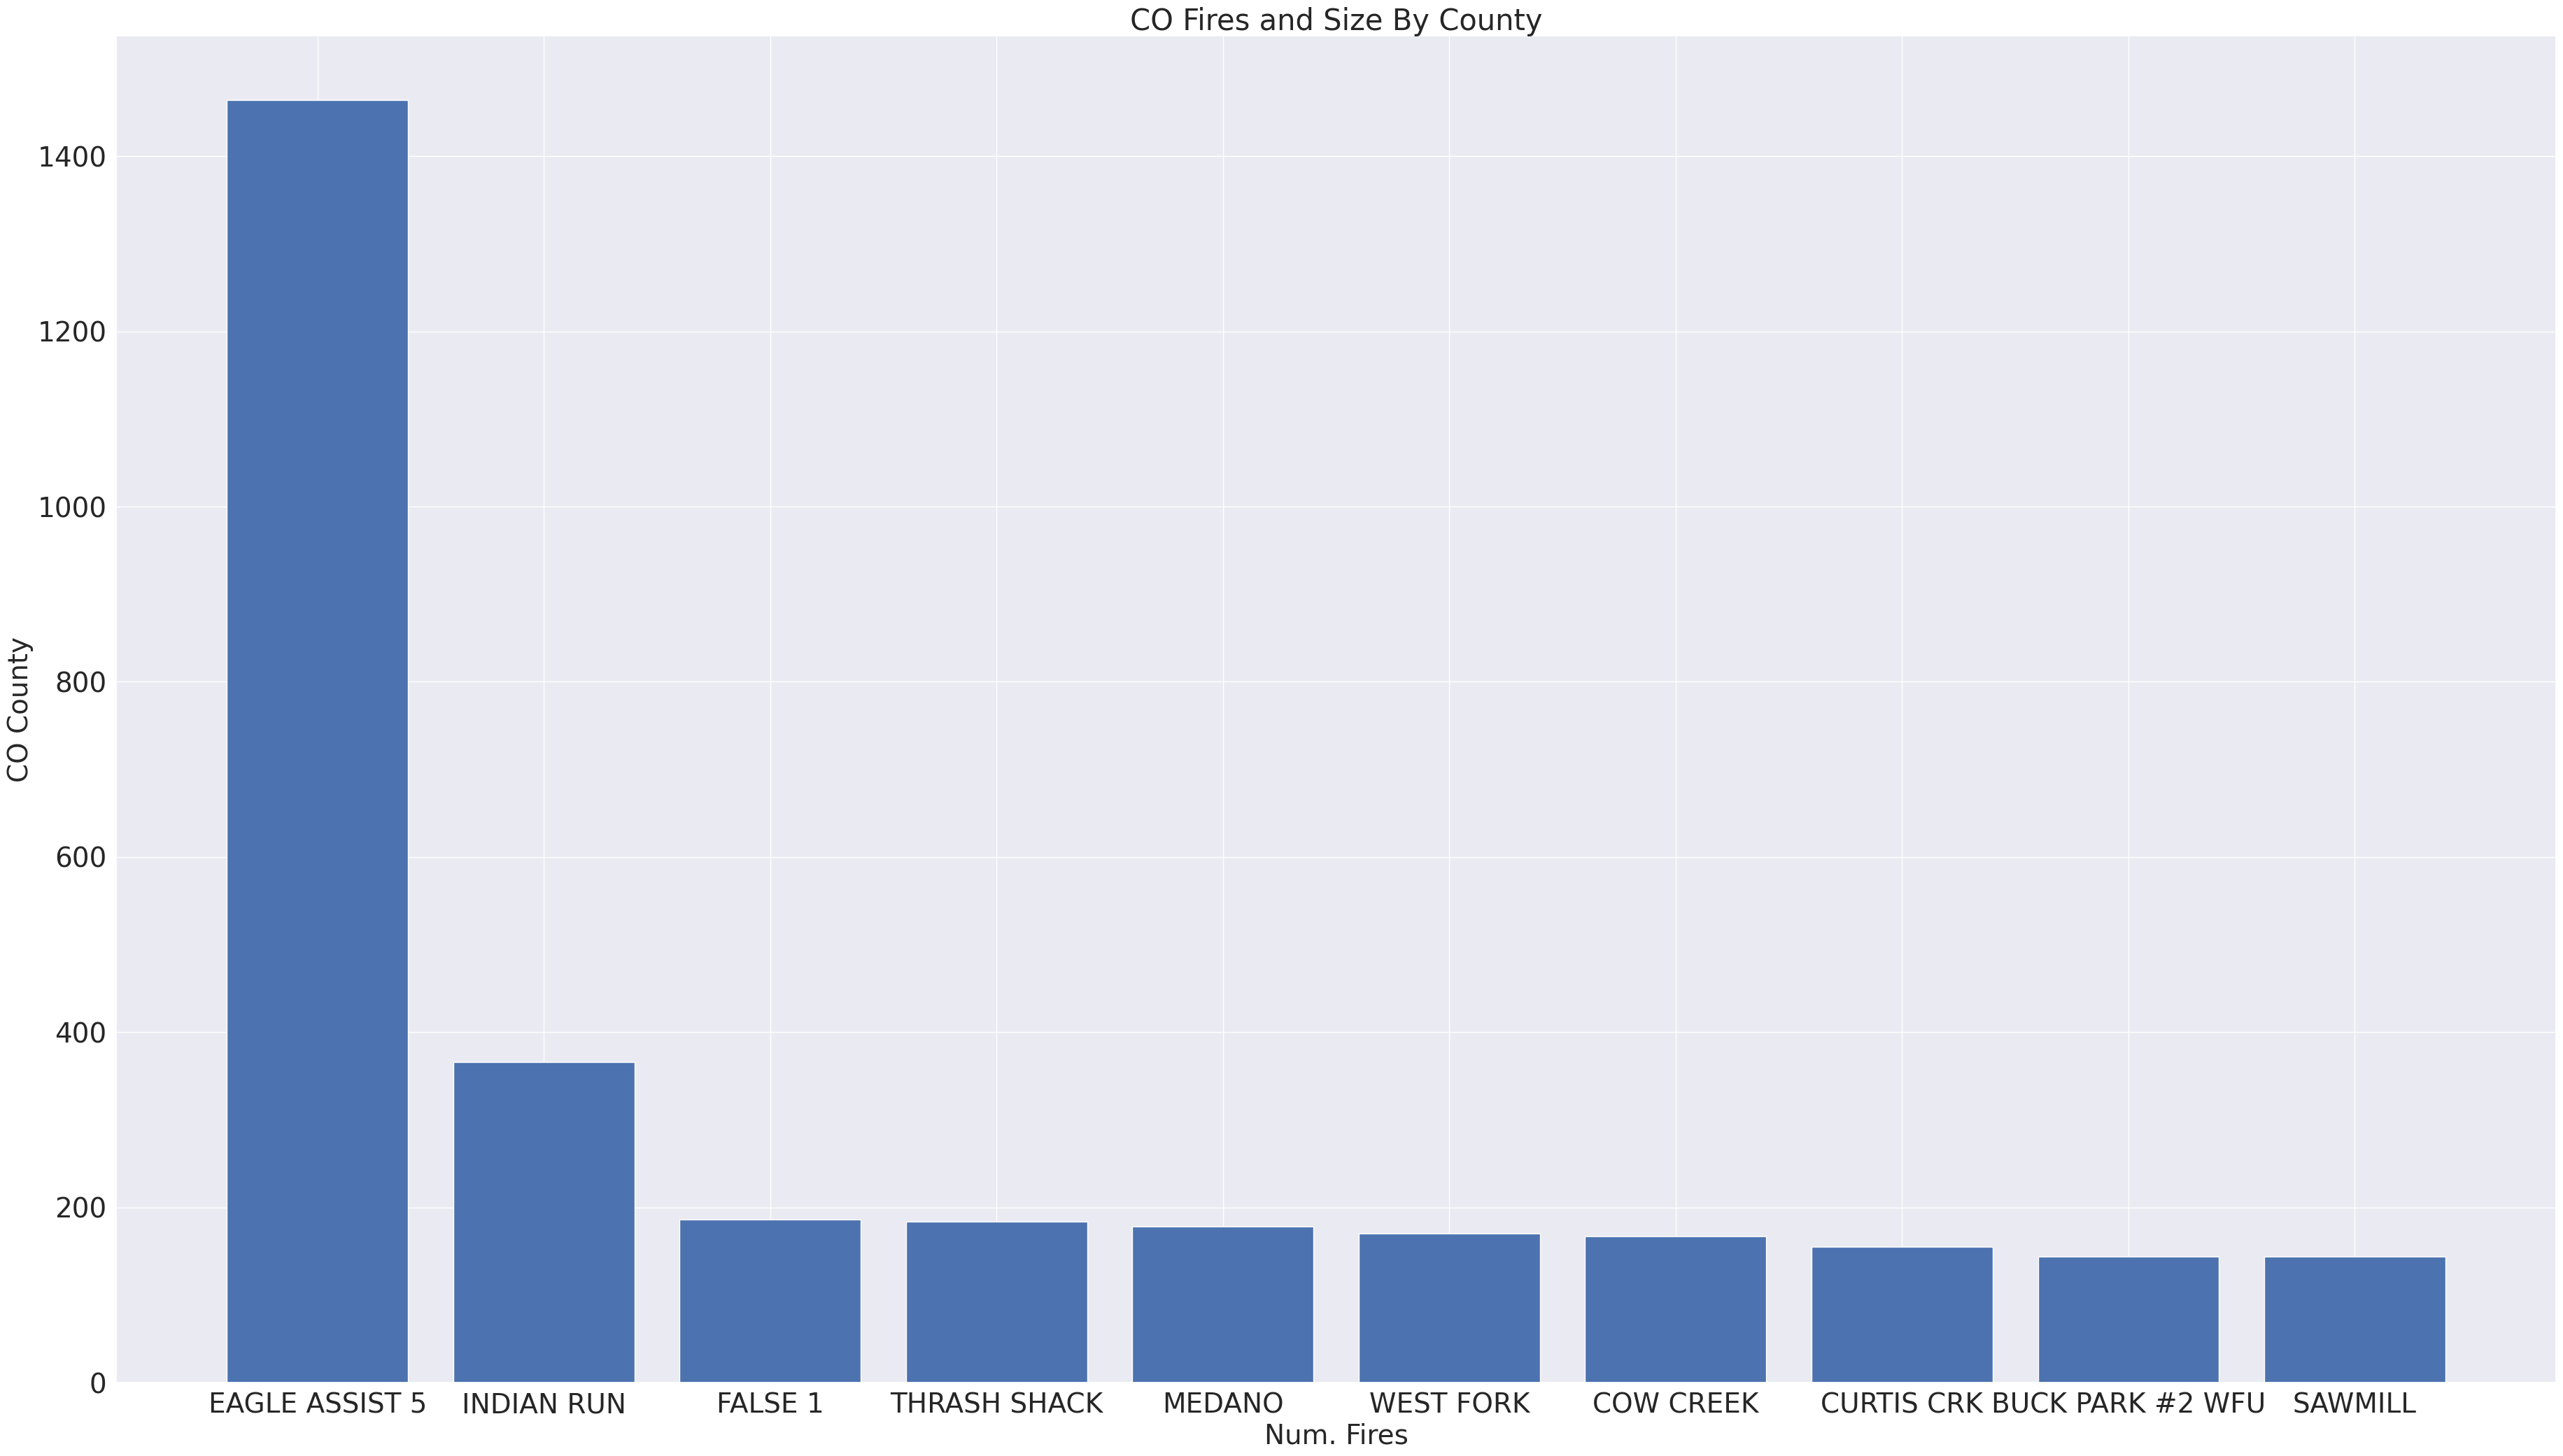

In [45]:
plt.figure(figsize=(45,25))
plt.bar(NameDur2['FIRE_NAME'], NameDur2['FIRE_DURATION_DAYS'])
plt.title("CO Fires and Size By County", fontsize = 30)
plt.xlabel("Num. Fires", fontsize = 28)
plt.ylabel("CO County", fontsize = 28)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.show()

In [46]:
pd.set_option('display.max_columns', None)

In [47]:
CoFires.loc[CoFires['FOD_ID']== 332670]

OBJECTID  FOD_ID    FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
16992    325492  332670  W-507314                FED      DOI-WFMI   

      NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID NWCG_REPORTING_UNIT_NAME  \
16992                   BLM                USCOGJD       Northwest District   

      SOURCE_REPORTING_UNIT            SOURCE_REPORTING_UNIT_NAME  \
16992                 COGJD  Western Slope Center, Grand Junction   

       LOCAL_FIRE_REPORT_ID LOCAL_INCIDENT_ID FIRE_CODE       FIRE_NAME  \
16992                   NaN               NaN      B5EF  EAGLE ASSIST 5   

      ICS_209_INCIDENT_NUMBER ICS_209_NAME MTBS_ID MTBS_FIRE_NAME  \
16992                     NaN          NaN     NaN            NaN   

      COMPLEX_NAME  FIRE_YEAR DISCOVERY_DATE  DISCOVERY_DOY  DISCOVERY_TIME  \
16992          NaN       2005     2005-08-25            237          2045.0   

       STAT_CAUSE_CODE STAT_CAUSE_DESCR  CONT_DATE  CONT_DOY  CONT_TIME  \
16992                1        Lightning 2009-08-28     240.0     1859.0   

       FIRE_SIZE FIRE_SIZE_CLASS  LATITUDE  LONGITUDE  OWNER_CODE OWNER_DESCR  \
16992        0.1               A    39.658  -106.8608           8     PRIVATE   

      STATE COUNTY  FIPS_CODE FIPS_NAME  \
16992    CO  Eagle       37.0     Eagle   

                                                   Shape FIRE_DURATION_DAYS  
16992  0001ad1000006419e25817b75ac05862105839d4434064...          1464 days

In [48]:
CoFires.head()

OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0        48      48  FS-1418940                FED   FS-FIRESTAT   
1        62      62  FS-1418976                FED   FS-FIRESTAT   
2        63      63  FS-1418978                FED   FS-FIRESTAT   
3       115     117  FS-1419150                FED   FS-FIRESTAT   
4       206     209  FS-1419344                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0                    FS                USCOPSF   
1                    FS                USCOPSF   
2                    FS                USCOPSF   
3                    FS                USCOPSF   
4                    FS                USCOPSF   

              NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
0  Pike and San Isabel National Forest                  0212   
1  Pike and San Isabel National Forest                  0212   
2  Pike and San Isabel National Forest                  0212   
3  Pike and San Isabel National Forest                  0212   
4  Pike and San Isabel National Forest                  0212   

        SOURCE_REPORTING_UNIT_NAME  LOCAL_FIRE_REPORT_ID LOCAL_INCIDENT_ID  \
0  Pike San Isabel National Forest                  22.0               001   
1  Pike San Isabel National Forest                  14.0               001   
2  Pike San Isabel National Forest                  29.0               003   
3  Pike San Isabel National Forest                  54.0               001   
4  Pike San Isabel National Forest                  20.0               004   

  FIRE_CODE       FIRE_NAME ICS_209_INCIDENT_NUMBER ICS_209_NAME MTBS_ID  \
0      BEX1           HATCH                     NaN          NaN     NaN   
1      BEX1  TROUT CREEK II                     NaN          NaN     NaN   
2      BU9J       MT ELBERT                     NaN          NaN     NaN   
3      BEX1             8GN                     NaN          NaN     NaN   
4      BT83          BEAVER                     NaN          NaN     NaN   

  MTBS_FIRE_NAME COMPLEX_NAME  FIRE_YEAR DISCOVERY_DATE  DISCOVERY_DOY  \
0            NaN          NaN       2005     2005-06-14            165   
1            NaN          NaN       2005     2005-05-30            150   
2            NaN          NaN       2005     2005-06-21            172   
3            NaN          NaN       2005     2005-07-07            188   
4            NaN          NaN       2005     2005-06-13            164   

   DISCOVERY_TIME  STAT_CAUSE_CODE STAT_CAUSE_DESCR  CONT_DATE  CONT_DOY  \
0          1300.0                1        Lightning 2005-06-14     165.0   
1          1100.0                1        Lightning 2005-05-31     151.0   
2          1241.0                4         Campfire 2005-06-21     172.0   
3          1907.0                1        Lightning 2005-07-07     188.0   
4          1428.0                9    Miscellaneous 2005-06-13     164.0   

   CONT_TIME  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE   LONGITUDE  OWNER_CODE  \
0     1530.0        0.5               B  39.292222 -105.183056           5   
1     1218.0        0.2               A  38.913333 -105.983611           5   
2     1506.0        0.1               A  39.100278 -106.367500           5   
3     2130.0       80.0               C  37.345000 -102.805833           5   
4     1736.0        2.5               B  38.891111 -105.431944          13   

        OWNER_DESCR STATE COUNTY  FIPS_CODE FIPS_NAME  \
0              USFS    CO    NaN        NaN       NaN   
1              USFS    CO    NaN        NaN       NaN   
2              USFS    CO    NaN        NaN       NaN   
3              USFS    CO    NaN        NaN       NaN   
4  STATE OR PRIVATE    CO    NaN        NaN       NaN   

                                               Shape FIRE_DURATION_DAYS  
0  0001ad10000040e3aa2eb74b5ac04808a78967a5434040...             0 days  
1  0001ad100000a85b037cf37e5ac03859471be8744340a8...             1 days  
2  0001ad100000e851b81e85975ac0d0cefce6d58c434

In [49]:
CoFires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34157 entries, 0 to 34156
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   OBJECTID                    34157 non-null  int64          
 1   FOD_ID                      34157 non-null  int64          
 2   FPA_ID                      34157 non-null  object         
 3   SOURCE_SYSTEM_TYPE          34157 non-null  object         
 4   SOURCE_SYSTEM               34157 non-null  object         
 5   NWCG_REPORTING_AGENCY       34157 non-null  object         
 6   NWCG_REPORTING_UNIT_ID      34157 non-null  object         
 7   NWCG_REPORTING_UNIT_NAME    34157 non-null  object         
 8   SOURCE_REPORTING_UNIT       34157 non-null  object         
 9   SOURCE_REPORTING_UNIT_NAME  34157 non-null  object         
 10  LOCAL_FIRE_REPORT_ID        12602 non-null  float64        
 11  LOCAL_INCIDENT_ID           12662 non-nul

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
from sklearn.metrics import classification_report

In [53]:
CoFires.OWNER_DESCR.nunique()

15

In [54]:
CoFire2 = CoFires[['STAT_CAUSE_DESCR', 'FIRE_YEAR', 'FIRE_SIZE', 'OWNER_DESCR', 'FIRE_DURATION_DAYS']]

In [55]:
CoFire2.head()

STAT_CAUSE_DESCR  FIRE_YEAR  FIRE_SIZE       OWNER_DESCR FIRE_DURATION_DAYS
0        Lightning       2005        0.5              USFS             0 days
1        Lightning       2005        0.2              USFS             1 days
2         Campfire       2005        0.1              USFS             0 days
3        Lightning       2005       80.0              USFS             0 days
4    Miscellaneous       2005        2.5  STATE OR PRIVATE             0 days

In [56]:
CoFire2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34157 entries, 0 to 34156
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   STAT_CAUSE_DESCR    34157 non-null  object         
 1   FIRE_YEAR           34157 non-null  int64          
 2   FIRE_SIZE           34157 non-null  float64        
 3   OWNER_DESCR         34157 non-null  object         
 4   FIRE_DURATION_DAYS  28325 non-null  timedelta64[ns]
dtypes: float64(1), int64(1), object(2), timedelta64[ns](1)
memory usage: 1.3+ MB


In [57]:
CoFire2.dropna(axis = 0, inplace = True)

<ipython-input-57-c9c728bd9617>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoFire2.dropna(axis = 0, inplace = True)


In [58]:
CoFire2['FIRE_DURATION_DAYS'] = CoFire2['FIRE_DURATION_DAYS'].dt.days

<ipython-input-58-e74a50f35d1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoFire2['FIRE_DURATION_DAYS'] = CoFire2['FIRE_DURATION_DAYS'].dt.days


In [59]:
CoFire2['STAT_CAUSE_DESCR'], unique_labels = pd.factorize(CoFire2['STAT_CAUSE_DESCR'])

<ipython-input-59-16c95b91fe24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoFire2['STAT_CAUSE_DESCR'], unique_labels = pd.factorize(CoFire2['STAT_CAUSE_DESCR'])


In [60]:
CoFire2['OWNER_DESCR'], unique_labels2 = pd.factorize(CoFire2['OWNER_DESCR'])

<ipython-input-60-677134b84bef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CoFire2['OWNER_DESCR'], unique_labels2 = pd.factorize(CoFire2['OWNER_DESCR'])


In [61]:
X = CoFire2[['FIRE_YEAR', 'FIRE_SIZE', 'OWNER_DESCR','FIRE_DURATION_DAYS']]
y = CoFire2['STAT_CAUSE_DESCR']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [63]:
clf = RandomForestClassifier(max_depth=12, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
class_report = classification_report(y_train, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     15348
           1       0.58      0.32      0.41      1955
           2       0.80      0.78      0.79      3176
           3       0.77      0.30      0.43       441
           4       0.89      0.14      0.24       332
           5       0.93      0.13      0.24       304
           6       0.60      0.21      0.31       434
           7       0.95      0.25      0.39        73
           8       1.00      0.12      0.21        84
           9       0.66      0.37      0.47       172
          10       0.00      0.00      0.00         4
          11       1.00      0.15      0.26        33
          12       0.88      0.57      0.69       304

    accuracy                           0.81     22660
   macro avg       0.76      0.33      0.41     22660
weighted avg       0.80      0.81      0.79     22660



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
y_pred_test = clf.predict(X_test)
class_report_test = classification_report(y_test, y_pred_test)
print(class_report_test)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3815
           1       0.50      0.30      0.37       460
           2       0.78      0.73      0.75       833
           3       0.31      0.09      0.14       119
           4       0.33      0.02      0.04        86
           5       0.00      0.00      0.00        79
           6       0.28      0.08      0.12       119
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        14
           9       0.54      0.38      0.44        37
          11       0.00      0.00      0.00        12
          12       0.50      0.35      0.41        75

    accuracy                           0.78      5665
   macro avg       0.34      0.24      0.26      5665
weighted avg       0.73      0.78      0.75      5665



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


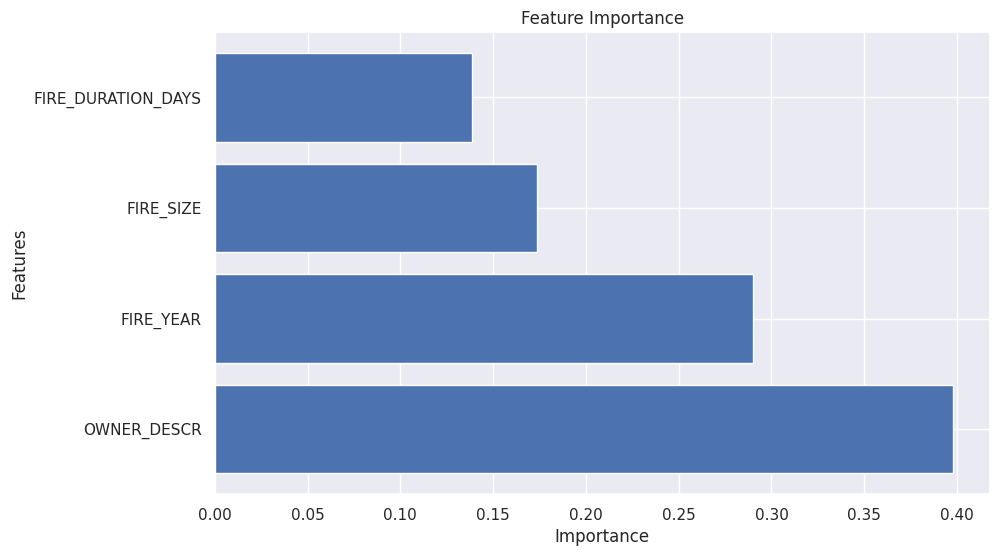

In [65]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = clf.feature_importances_
feature_names = X_train.columns

indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[indices]
sorted_feature_names = feature_names[indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()